# **BINARY INCOME CLASSIFICATION WITH MACHINE LEARNING**
# **An End-to-End Pipeline from Raw Data to Predictive Insights**

## **INTRODUCTION**

### **Project Overview**  

This project involves building a machine learning model to predict whether an individual's annual income exceeds $50,000 using census data. The pipeline includes data exploration, cleaning, exploratory data analysis(EDA), feature engineering and selection, hyperparamter tuning, model development, and evaluation with the goal of uncovering insights and creating a high-performing classifier.

### **Problem Statement**  

Income classification is a valuable task in fields such as policy analysis, targeted marketing, credit scoring, and economic research. However, predicting income levels accurately poses several challenges, particularly due to class imbalance and the complex, non-linear relationships between features.

In this project, the aim is to develop a machine learning model that not only performs well overall but also excels at correctly identifying individuals earning more than $50K per year which is a minority class in the dataset. This requires a balanced approach that improves recall for high-income earners without significantly compromising precision or overall model accuracy.

### **Dataset Description**  

The dataset consists of over 48,000 individual records from census data, with a mix of categorical and numerical variables related to personal demographics, education, employment, and financial status. Below is a description of each feature:

**Age:** The individual's age in years.

**Workclass:** The type of employment or work arrangement, such as Private, Government, Self-employed, or Unemployed.

**Fnlwgt:** A census weight assigned to each record, representing how many people in the population the individual is assumed to represent.

**Education:** The highest level of education attained by an individual, e.g., Bachelors, Some-college, 12th grade, Doctorate.

**Education-num:** A numerical representation of education level that reflects the education hierarchy.

**Marital-status:** The marital status of the individual, such as Married, Divorced, or Never-married.

**Occupation:** The specific job or profession of the individual (e.g., Exec-managerial, Craft-repair, Sales).

**Relationship:** The individual's role in their household (e.g., Husband, Wife, Own-child, Not-in-family).

**Race:** The individual's racial identification, such as White, Black, Asian-Pac-Islander, etc.

**Sex:** The gender of the individual, typically Male or Female.

**Capital-gain:** The capital gains made by the individual.

**Capital-loss:** The capital losses incurred by the individual.

**Hours-per-week:** The number of hours the individual works in a typical week.

**Native-country:** The country of origin or citizenship (e.g., United States, Mexico, Canada).

**Income:** The target variable — indicates whether the individual earns more than $50K(>50k) or %50K or less (<=50k) annually.

This dataset provides a rich foundation for both data exploration and predictive modeling, allowing us to identify key socioeconomic factors associated with higher income levels.



## **Installing and Importing Useful Libraries for the Project**

#### **Installations**

In [1]:
# Upgrading pip to ensure compatibility with newer packages like xgboost

!pip install --upgrade pip


In [2]:
# installing XGBoost

!pip install xgboost

#### **Imports**

In [3]:

# Importing Standard Libraries
import numpy as np
import pandas as pd
import warnings
import joblib

# Imports for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')  # Optional: set default plot style

# Ignore warnings
warnings.filterwarnings("ignore")

# Imports for Preprocessing & Pipelines
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Import for Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV

# Importing Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Importing Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report
)



## **Loading the Dataset**

In [4]:
file = "income_data.csv"
df = pd.read_csv(file)           # loading and converting the dataset into a dataframe and assigning the dataset to the variable 'df'

## **Dataset Exploration**

In [5]:
# Having a view or nature of the distribution of the whole dataset

df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [6]:
# getting overall information about the dataset including datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
# getting summary data on numerical columns in the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [8]:
# viewing original duplicate values

duplicates = df.duplicated().sum()
print("Number of duplicates:", duplicates)

Number of duplicates: 48


In [9]:
# viewing columns with null values
null_values = df.isnull().sum()
display("Null Values", null_values)

'Null Values'

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [10]:
# understanding the column names

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [11]:
# viewing unique observations in each column

#creating a for loop to loop over every cplumn in the dataframe
for col in df.columns:
    print(f"\nUnique Values in: {col}")
    print(df[col].unique())


Unique Values in: age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]

Unique Values in: workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]

Unique Values in: fnlwgt
[ 77516  83311 215646 ... 173449  89686 350977]

Unique Values in: education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Unique Values in: education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

Unique Values in: marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Unique Values in: occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-s

In [12]:
# viewing unique observations and count in each column.

# creating a for loop to loop over every column in the dataframe
for col in df.columns:
    print(f"\nUnique Values and Count in: {col}")
    print(df[col].value_counts())




Unique Values and Count in: age
age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64

Unique Values and Count in: workclass
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

Unique Values and Count in: fnlwgt
fnlwgt
203488    21
120277    19
190290    19
126569    18
125892    18
          ..
275677     1
311631     1
374763     1
242136     1
26711      1
Name: count, Length: 28523, dtype: int64

Unique Values and Count in: education
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834

In [13]:
dtypes_count = df.dtypes.value_counts()
print ("\nCount of different datatypes:\n", dtypes_count)

# classifying categorical datatypes
object_dtypes = df.select_dtypes(include='object').columns
print("\nColumns with Object Datatype\n", object_dtypes)

# classifying numeric datatypes
int64_dtypes = df.select_dtypes(include='int64').columns
print("\nColumns with int64 Datatype\n", int64_dtypes)




Count of different datatypes:
 object    9
int64     6
Name: count, dtype: int64

Columns with Object Datatype
 Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

Columns with int64 Datatype
 Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


### **Initial Observations from the Raw Dataset**

- The dataset has 48,842 rows and 15 columns  
- The dataset has initial 48 duplicate rows  
- The dataset has 15 columns in total, 3 have null values namely: workclass(963), occupation(966) and native_country(274)
- All column names are in underscores but some are separated by dashes
- There are 9 categorical columns - with datatype object('workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income) and 6 numeric columns - with datatype int64('age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week')
- From the describe function we can see an odd distribution in capital-loss and capital-gain columns.
- The unique values for each column looks appropriate for the different features with the exception of 'workclass', 'occupation' and 'native-country' columns have '?' and 'nan' as part of their unique values
- From the Problem statement, our target Feature is income which is an object datatype

## **Dataset Cleaning**

In [14]:
# Renaming columns for consistency

df.columns = df.columns.str.strip()   # removing any leading or trailing whitespace from each column name.

df.columns = df.columns.str.lower()   # Converting all characters in each column name to lowercase. Extra confirmation

df.columns = df.columns.str.replace('-', '_')  # replacing hyphens(dashes) with undercores so my columns names are in proper snake case for consistency

# confirmation
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')


In [15]:
# Stripping Whitespace from our Categorical columns. Incase there are any trailing whitespaces

for col in df.select_dtypes(include='object'):
    df[col] = df[col].str.strip()


In [16]:
# Duplicate check

duplicates = df.duplicated().sum()
print("Number of duplicates:", duplicates)

Number of duplicates: 48


#### **Converting Target Variable to Appropriate datatype**

In [17]:
# converting variables to appropriate datatypes

# Converting our Target Feature 'income' from object a categorical datatype to int64 a numeric datatype


df['income'] = df['income'].replace({'<=50K': 0, '>50K': 1})

#confirming change has been made
df['income'].unique()


array([0, 1])

#### **Dropping Irrelevant Columns**

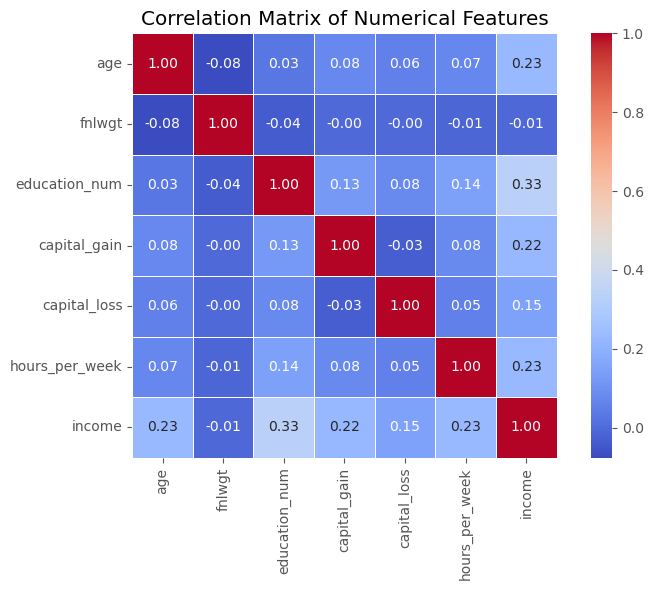

In [18]:
# Plotting a correlation heatmap to confirm the correlation of numeric features

# Selecting only numeric columns
numeric_df = df.select_dtypes(include='number')

# Computing correlation
correlation_matrix = numeric_df.corr()


# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)

plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()




**Dropping irrelevant columns**
- It is clear that all features have a meaningful correlation with the target feature and themselves except for 'fnlwgt'

- The fnlwgt column represents a census weight assigned to each record, representing how many people in the population the individual is assumed to represent.

- This column is dropped due to its lack of predictive value and it does not add any meaningful insights rather it will add noise if used.

**Dropping the 'fnlwgt' feature**

In [19]:
# Dropping irrelevant columns('fnlwgt')

df = df.drop("fnlwgt", axis=1)


In [20]:
# Confirming 'fnlwgt' column has been dropped
df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')

### **Handling Missing Values**

In [21]:
# handling missing values and NaN

# First replacing the '?' in workclass, occupation and native-country columns with nan
for col in ['workclass', 'occupation', 'native_country']:
    df[col].replace('?' , np.nan, inplace=True)

# viewing the new number of null values
current_null_values = df.isnull().sum()
display(current_null_values)

print("\nworklass has 2799 null values")
print("\noccupation has 2809 null values")
print("\nnative_country has 857 null values")


age                  0
workclass         2799
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
income               0
dtype: int64


worklass has 2799 null values

occupation has 2809 null values

native_country has 857 null values


In [22]:
# Filling out the null values with the mode of each respective column


for col in ['workclass', 'occupation', 'native_country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# confirming there are no more missing or null values
df.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

**Reason For Handling Missing Values**  
I addressed missing values to prevent model errors and maintain data quality. Since the affected columns are categorical, I filled them using the mode (most frequent value), which is a simple and effective way to preserve common patterns without introducing bias.  

This ensures a clean and consistent dataset for data analysis and model training.



In [23]:
# Checking current number of duplicates

duplicates = df.duplicated().sum()
print("Number of duplicates:", duplicates)

Number of duplicates: 6604


In [24]:
df.shape

(48842, 14)

In [25]:
df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')

### **Grouping Column Categories**
I grouped similar categories to reduce sparsity, simplify the data, and help the model generalize better.  
This will improve model performance, prevent overfitting, and make EDA more interpretable.

In [26]:
# Grouping the values in certain columns like education and

# workclass
df.workclass = df.workclass.replace([ "Local-gov", "State-gov", "Federal-gov",], "Government")  # grouping all the government workers together
df.workclass = df.workclass.replace(["Self-emp-inc", "Self-emp-not-inc"], "Self-employed")  # grouping all the self-empl0yed together
df.workclass = df.workclass.replace(["Without-pay", "Never-worked"], "Unemployed")          # grouping those without a paying job together


# education
df.education = df.education.replace(["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th",], "Low")   # grouping all those that never finished high school together
df.education = df.education.replace("HS-grad", "High-school")  # propryly naming those that graduated highschool
df.education = df.education.replace(["Assoc-acdm", "Assoc-voc" ], "Associate")  # grouping all the associates together
df.education = df.education.replace(["Prof-school", "Doctorate"], "Highest")    # grouping all those with qualifications higher than masters together as highest

# I am not grouping educayion num because it is already an ordinal numerical feature and perfect for my model to understand
# marital status
df.marital_status = df.marital_status.replace(["Married-civ-spouse", "Married-AF-spouse"], "Married-spouse-present")  # grouping those civil married and those married with Airforce spouse are those married with present spouse

# nativecountry
df.native_country = df.native_country.replace(["Canada", "Outlying-US(Guam-USVI-etc)",], "North-America")
df.native_country = df.native_country.replace(["Cuba", "Jamaica", "Puerto-Rico", "Dominican-Republic", "Haiti", "Trinadad&Tobago"], "Central America & Caribbean")
df.native_country = df.native_country.replace(["Mexico", "Honduras", "El-Salvador", "Guatemala", "Nicaragua", "Columbia", "Ecuador", "Peru"], "South-America")
df.native_country = df.native_country.replace(["England", "Germany", "Italy", "Poland", "Portugal", "France", "Scotland", "Greece", "Ireland", "Hungary", "Yugoslavia", "Holand-Netherlands"], "Europe")
df.native_country = df.native_country.replace(["India", "Iran", "Philippines", "Cambodia", "Thailand", "Laos", "Taiwan", "China", "Japan", "Vietnam", "Hong"], "Asia")




In [27]:
grouped_columns = df[["workclass","education","marital_status", "native_country"]]

In [28]:
# confirming the changes have been made

# assigning affected columns to a variable
grouped_columns = df[["workclass","education","marital_status", "native_country"]]

# creating a for loop to quickly loop over the affected columns and give me their unique values
for col in grouped_columns:
    print(f"\nUnique Values and Count in: {col}")
    print(df[col].value_counts())


Unique Values and Count in: workclass
workclass
Private          36705
Government        6549
Self-employed     5557
Unemployed          31
Name: count, dtype: int64

Unique Values and Count in: education
education
High-school     15784
Some-college    10878
Bachelors        8025
Low              6408
Associate        3662
Masters          2657
Highest          1428
Name: count, dtype: int64

Unique Values and Count in: marital_status
marital_status
Married-spouse-present    22416
Never-married             16117
Divorced                   6633
Separated                  1530
Widowed                    1518
Married-spouse-absent       628
Name: count, dtype: int64

Unique Values and Count in: native_country
native_country
United-States                  44689
South-America                   1439
Asia                             981
Europe                           780
Central America & Caribbean      633
North-America                    205
South                            115
Name: cou

In [29]:
# Duplicates Check

duplicates = df.duplicated().sum()
print("Number of duplicates:", duplicates)

Number of duplicates: 6904


### **Dropping Duplicates**

In [30]:
# Dropping Duplicates

df = df.drop_duplicates()

# confirming duplicates have been dropped
duplicates = df.duplicated().sum()
print("Number of duplicates:", duplicates)

# viewing new shape of dataset
print("New shape of Dataframe:", df.shape)


Number of duplicates: 0
New shape of Dataframe: (41938, 14)


**Why I dropped Duplicates**  
I dropped duplicate rows to eliminate redundant records that could bias the model or inflate performance metrics.  
Removing them ensured that the dataset was clean, reduced noise, and helped improve the accuracy and fairness of the model.

## **Exploratory Data Analysis(EDA)**

In [31]:
# making a copy of our cleaned dataset to preserve reusability

df_cleaned = df.copy()
df_cleaned.shape

(41938, 14)

In [32]:
# Separating categorical variables from numeric variables to view distributions and for EDA

df_num = df.select_dtypes(include="number")
df_cat = df.select_dtypes(exclude="number")

### **Understanding the Dataset Distribution to inform my EDA**

#### **Correlation and Distribution of numerical features**

#### **Correlation Heatmap (for numeric features)**

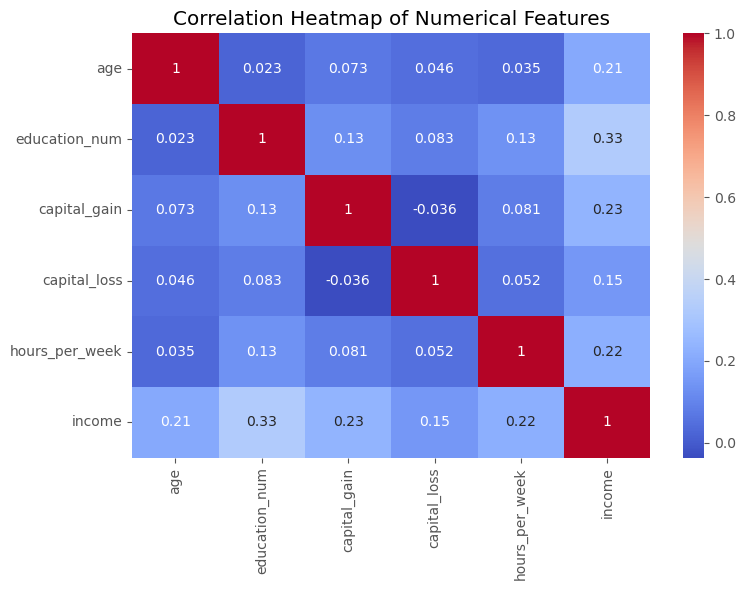

In [33]:
# Plotting the Correlation Heatmap

plt.figure(figsize=(8, 6))                                              # setting figure size
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')    # Plot correlation heatmap
plt.title('Correlation Heatmap of Numerical Features')                  # Add Title
plt.tight_layout()                                                      # Adjust layout
plt.show()

### **Insight**  
- The correlation heatmap shows that education_num has the strongest positive relationships with income, followed by capital_gain, hours_per_week and age respectively with not much difference between them. Capital_loss also show mild correlation.
- These features are likely to be important predictors in the model and important in guiding the EDA.
- No pairs of variables show dangerously high inter-correlation, so multicollinearity is not a concern at this stage.

In [34]:
# Viewing Statistical Summary of Numerical Variables

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41938.0,39.501455,13.794822,17.0,29.0,38.0,49.0,90.0
education_num,41938.0,10.086723,2.662474,1.0,9.0,10.0,13.0,16.0
capital_gain,41938.0,1238.306262,7965.237945,0.0,0.0,0.0,0.0,99999.0
capital_loss,41938.0,101.075850,431.537769,0.0,0.0,0.0,0.0,4356.0
hours_per_week,41938.0,40.654180,12.915877,1.0,38.0,40.0,45.0,99.0
income,41938.0,0.245148,0.430180,0.0,0.0,0.0,0.0,1.0


### **Distribution of Numerical Features**

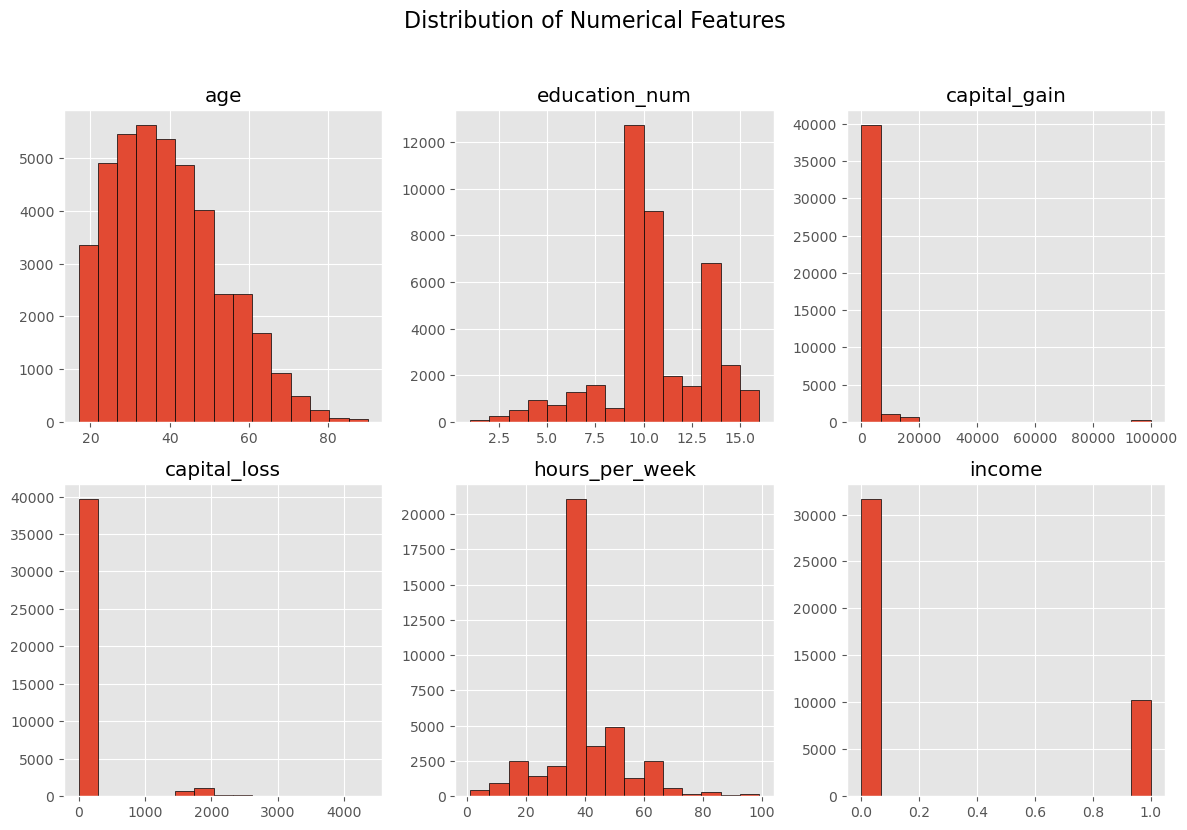

In [35]:
# Graphical Representation of the Distribution of Numerical Variables

df_num.hist(figsize=(12, 12), layout=(3, 3), sharex=False, edgecolor='black', bins=15)   # Plot histograms for numerical features
plt.suptitle('Distribution of Numerical Features', fontsize=16)                          # Add overall title
plt.tight_layout(rect=[0, 0, 1, 0.96])                                                   # Adjusting space to fit title
plt.show()

### **Skewness of Numerical Features**

In [36]:
# Using a for loop to print skewness for each numeric column

print("\nSkewness of Numerical Features:\n")
for col in df_num.columns:
    skew = df[col].skew().round(2)
    shape = 'Right-skewed' if skew > 0 else 'Left-skewed' if skew < 0 else 'Symmetrical'
    print(f"{col}: {skew} ({shape})")


Skewness of Numerical Features:

age: 0.54 (Right-skewed)
education_num: -0.36 (Left-skewed)
capital_gain: 11.1 (Right-skewed)
capital_loss: 4.21 (Right-skewed)
hours_per_week: 0.26 (Right-skewed)
income: 1.18 (Right-skewed)


### **Visualizing the Imbalance in the Dataset as Regards the Target**

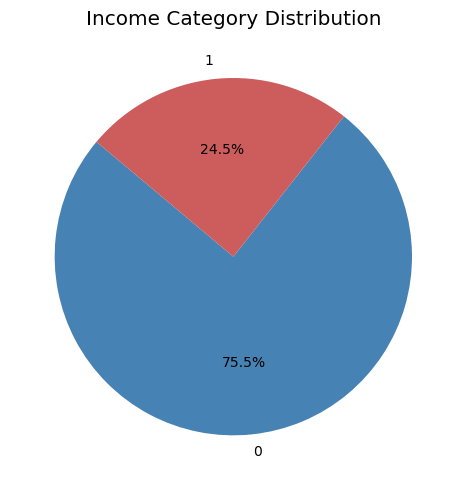

In [37]:
# Step 1: Count the occurrences of each income class
target_counts = df['income'].value_counts()
target_percent = target_counts / target_counts.sum() * 100  # Convert to percentages

# Define custom colors: Blue for <=50K, Red for >50K (minority)
custom_colors = ['steelblue', 'indianred']

plt.figure(figsize=(5, 5))
plt.pie(
    target_counts.values,
    labels=target_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=custom_colors
)
plt.title('Income Category Distribution')
plt.tight_layout()
plt.show()

### **Interpretation and Insights From Numerical Feature Distributions**  

**1. Age**  
- The distribution is right-skewed, with most individuals aged between 30 and 40. There's a gradual decline beyond age 60, and very few entries above 80.
- The dataset is dominated by working-age adults, which is relevant for income analysis since they are at their career peak.

**2. Education Number (education_num)**  
- This variable has discrete values with peaks around 9 (High school), 10–13 (Some-college to Bachelor’s), and few values at the lowest or highest ends.
- Most individuals have at least a high school education, with a good portion attaining higher education aligning with income-driving factors.

**3. Capital Gain**  
- The distribution is extremely right-skewed. Most entries are 0, with a few large values.
- Capital gain is rare but, when present, strongly indicates higher income.

**4. Capital Loss**  
- The distribution is sparse and right-skewed, similar to capital gain. Most values are 0, with a few spikes at fixed loss amounts.
- Capital loss is also rare but may hold predictive value.

**5. Hours Per Week**  
- Most values cluster around 40 hours (standard full-time), with a long tail extending to 99 hours.
- The majority of individuals are full-time workers. Those working significantly longer hours could be high earners, and extreme outliers may need clipping.

**6. Income (numeric: 0 and 1)**  
- The histogram shows a clear class imbalance, with far more individuals (75.5%) in the <=50K (0) group than in the >50K (1) group making only 24.5% of the dataset.
- This imbalance should be accounted for during model training, potentially using stratified sampling or class weights to prevent bias.

### **Distribution of Categorical Features**


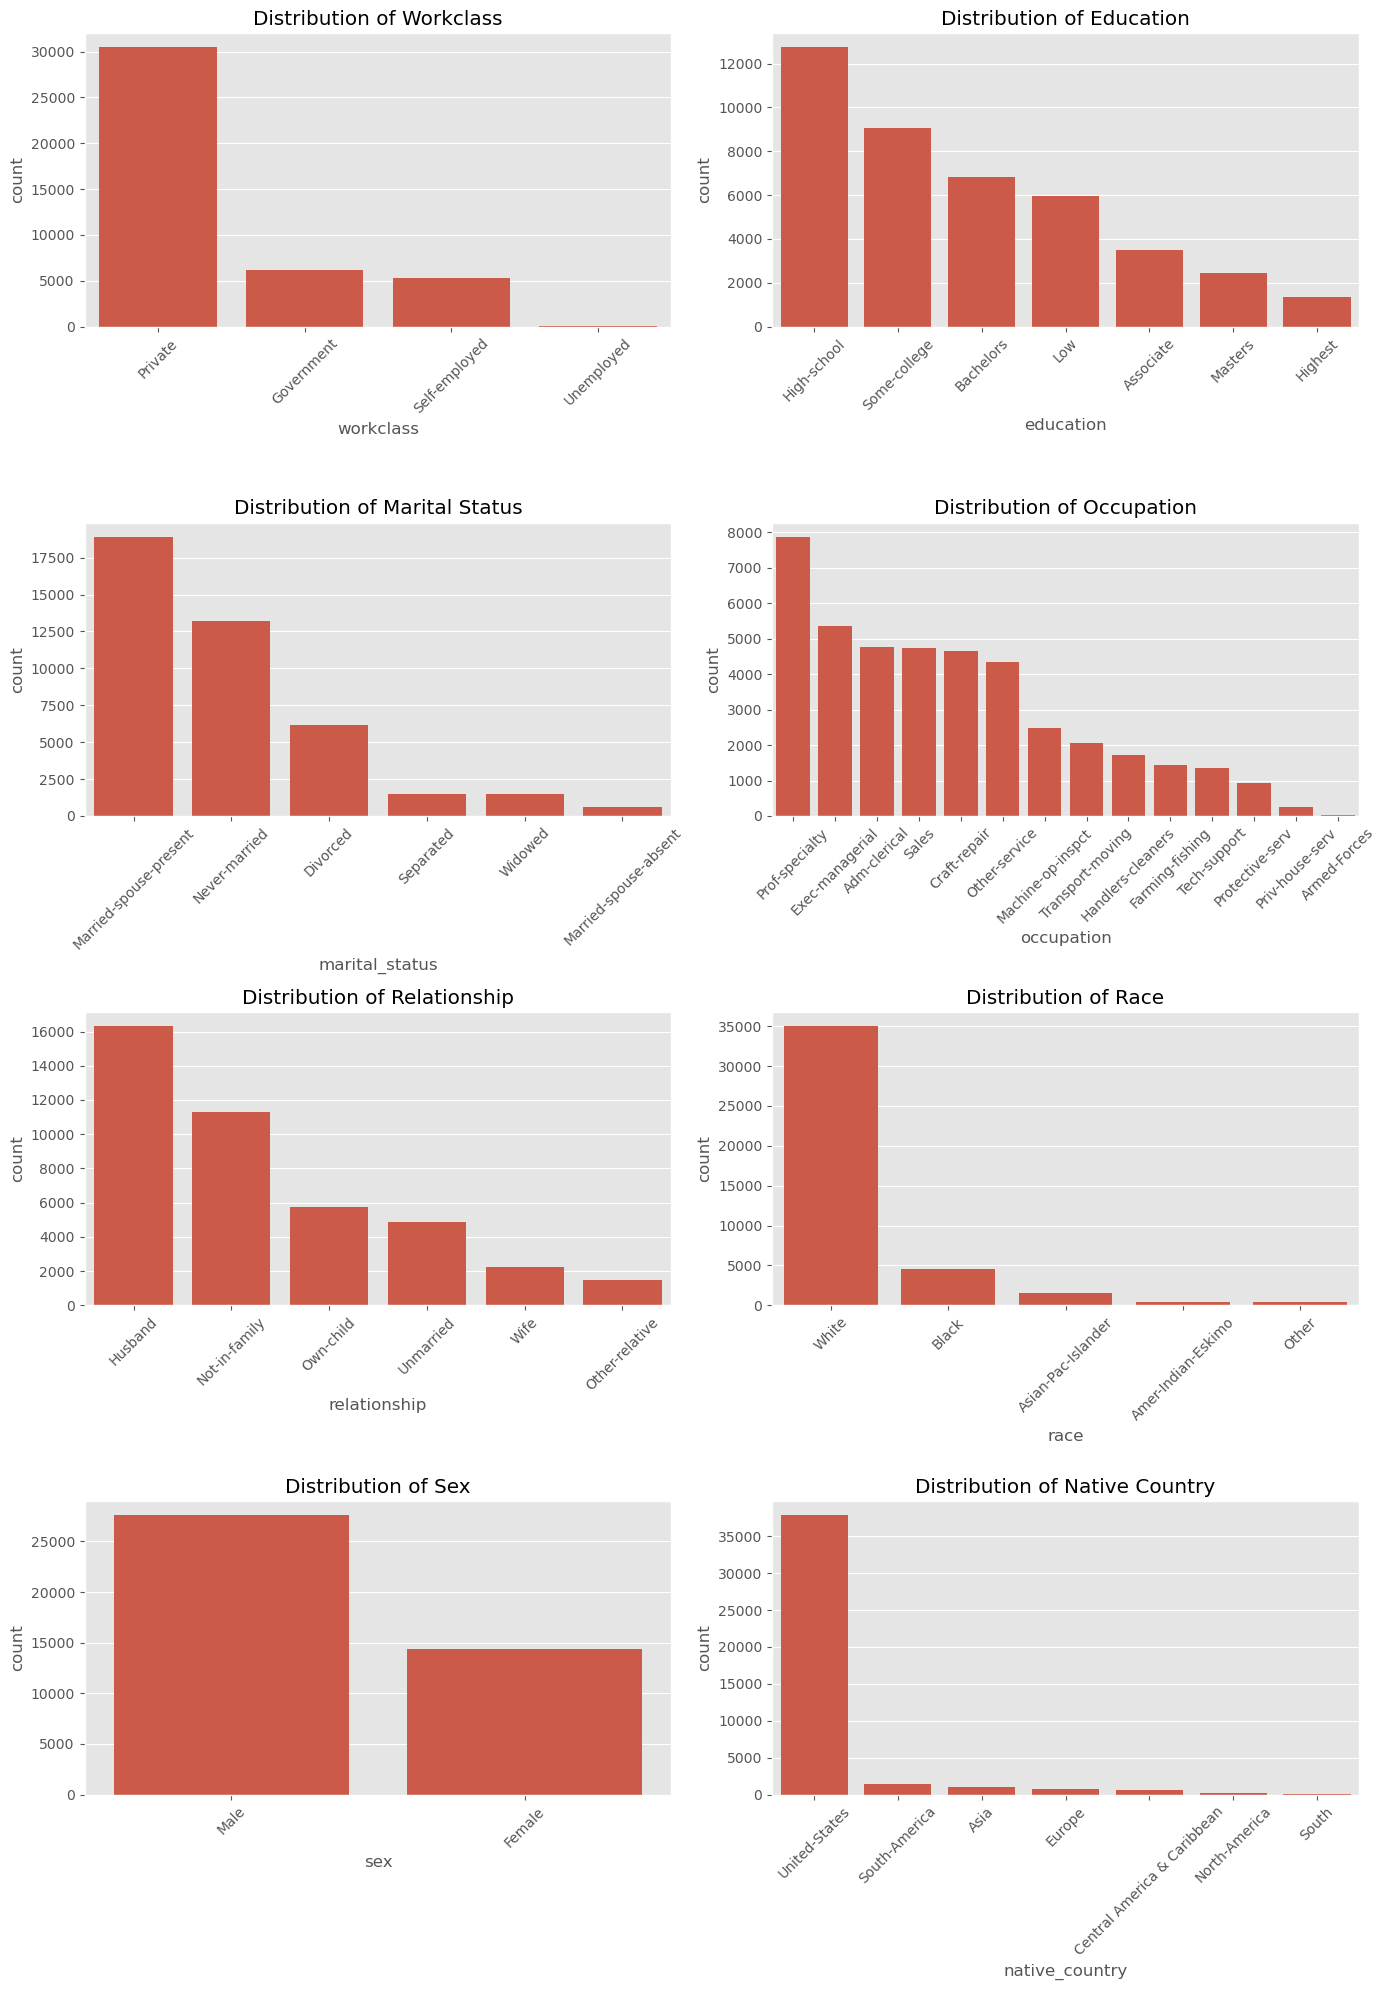

In [38]:
# Plotting histograms

titles = [col.replace('_', ' ').title() for col in df_cat]                # Format column names for titles

plt.figure(figsize=(14, 20))                                              # Set overall figure size

for i, col in enumerate(df_cat):
    plt.subplot(4, 2, i+1)                                                # Create subplot grid (4 rows x 2 columns)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)     # Plot countplot for each categorical column
    plt.title(f'Distribution of {titles[i]}')                             # Add title to each subplot
    plt.xticks(rotation=45)                                               # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()

### **Percentage Distribution of Categorical columns**

In [39]:
# Using a for loop to Loop through each categorical column and calculate percentage distribution
for col in df_cat.columns:
    print(f"\n{col.replace('_', ' ').title()} Distribution:")

    # Getting value counts as percentages, rounded to 1 decimal place, and formatted with %
    percent_dist = df[col].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    
    # Printing the formatted percentage distribution
    print(percent_dist)


Workclass Distribution:
workclass
Private          72.7%
Government       14.6%
Self-employed    12.6%
Unemployed        0.1%
Name: proportion, dtype: object

Education Distribution:
education
High-school     30.4%
Some-college    21.6%
Bachelors       16.3%
Low             14.2%
Associate        8.4%
Masters          5.9%
Highest          3.3%
Name: proportion, dtype: object

Marital Status Distribution:
marital_status
Married-spouse-present    45.1%
Never-married             31.4%
Divorced                  14.8%
Separated                  3.6%
Widowed                    3.6%
Married-spouse-absent      1.5%
Name: proportion, dtype: object

Occupation Distribution:
occupation
Prof-specialty       18.8%
Exec-managerial      12.7%
Adm-clerical         11.3%
Sales                11.3%
Craft-repair         11.1%
Other-service        10.3%
Machine-op-inspct     5.9%
Transport-moving      4.9%
Handlers-cleaners     4.1%
Farming-fishing       3.4%
Tech-support          3.2%
Protective-serv  

### **Interpretation of Categorical Feature Distributions**  

**1. Workclass**  
- The majority of individuals (72.7%) are employed in the Private sector, followed by Government (14.6%) and Self-employed (12.6%).  
- This indicates a workforce primarily driven by private employment, which may influence general income trends.

**2. Education**  
- Most people have attained at least a High School education this reflects a relatively educated population: High-school (30.4%), Some-college (21.6%), and Bachelors (16.3%) are the top categories.
- Advanced degrees like Masters (5.9%) and Highest (3.3%) are less common but could signal higher earning potential.

**3. Marital Status**  
- Married-spouse-present (45.1%) and Never-married (31.4%) are the most frequent statuses.
- A large share of married individuals may point to greater financial or social stability within the dataset.

**4. Sex**  
- The dataset contains 65.8% males and 34.2% females, revealing a significant gender imbalance.
- This skew may affect insights related to gender-based income gaps.

**5. Race**  
- The population is predominantly White (83.5%), with minorities like Black (10.8%), Asian-Pacific Islander (3.6%), and others comprising the rest.
- This lack of racial diversity may limit some types of demographic income analysis.

**6. Native Country (Region)**  
- An overwhelming 90.2% of individuals are from the United States, with very small proportions from South America (3.3%), Asia (2.3%), and others.
- This reinforces that most insights drawn will be specific to the U.S. context.

**7. Relationship**
- Husbands (38.9%) make up the largest group, followed by Not-in-family (26.9%) and Own-child (13.7%).
- This aligns with the sex distribution and may imply many working-age male heads of households.

**8. Occupation**
- Top job categories include Prof-specialty (18.8%), Exec-managerial (12.7%), and Adm-clerical/Sales (11.3% each).
- These reflect a mix of white-collar and service roles, useful for exploring occupational impact on income.


### **Bivariate Analysis**

### **Age Distribution Across Income Group (Stacked Histogram)**

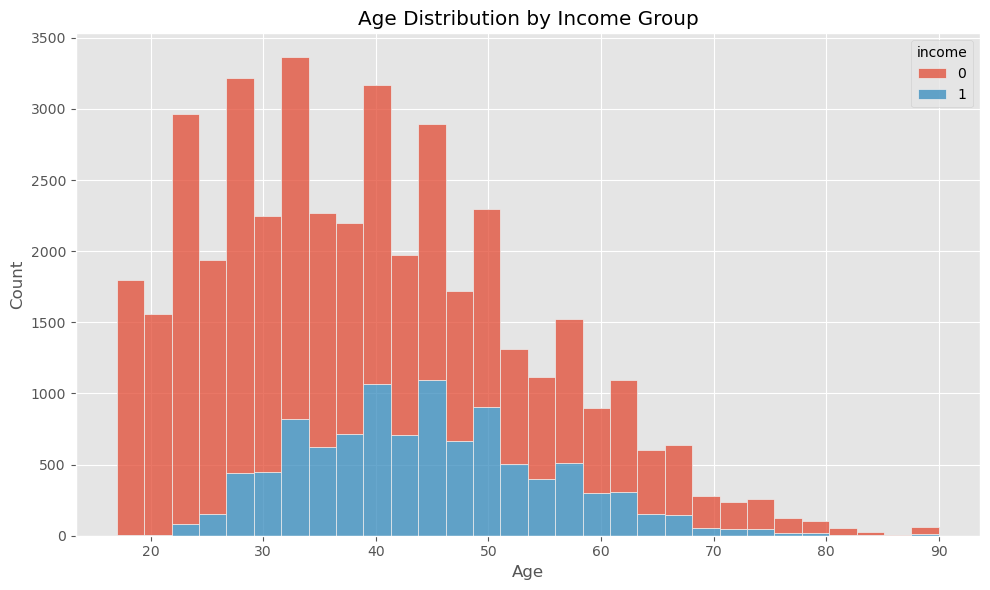

In [40]:
# Plotting histogram to compare Income Groups Against Age

plt.figure(figsize=(10, 6))                                                 # set figure size
sns.histplot(data=df, x='age', hue='income', bins=30, multiple='stack')     # Plot age distribution stacked by income group
plt.title('Age Distribution by Income Group')                               # Add plot title
plt.xlabel('Age')                                                           # Label x-axis
plt.ylabel('Count')                                                         # Label y-axis
plt.tight_layout()                                                          # Adjust layout to prevent overlap
plt.show()                                                                  # Display the plot

### **Insight**  
- The histogram reveals a clear age-income relationship. **Most individuals under 30 fall in the ≤50K income group, while the likelihood of earning >50K increases steadily from ages 35 to 50.** 
- This trend indicates that age which is often correlated with work experience and career progression, is a strong predictor of higher income.

### **Income Distribution by Education Level: Counts and Proportions**

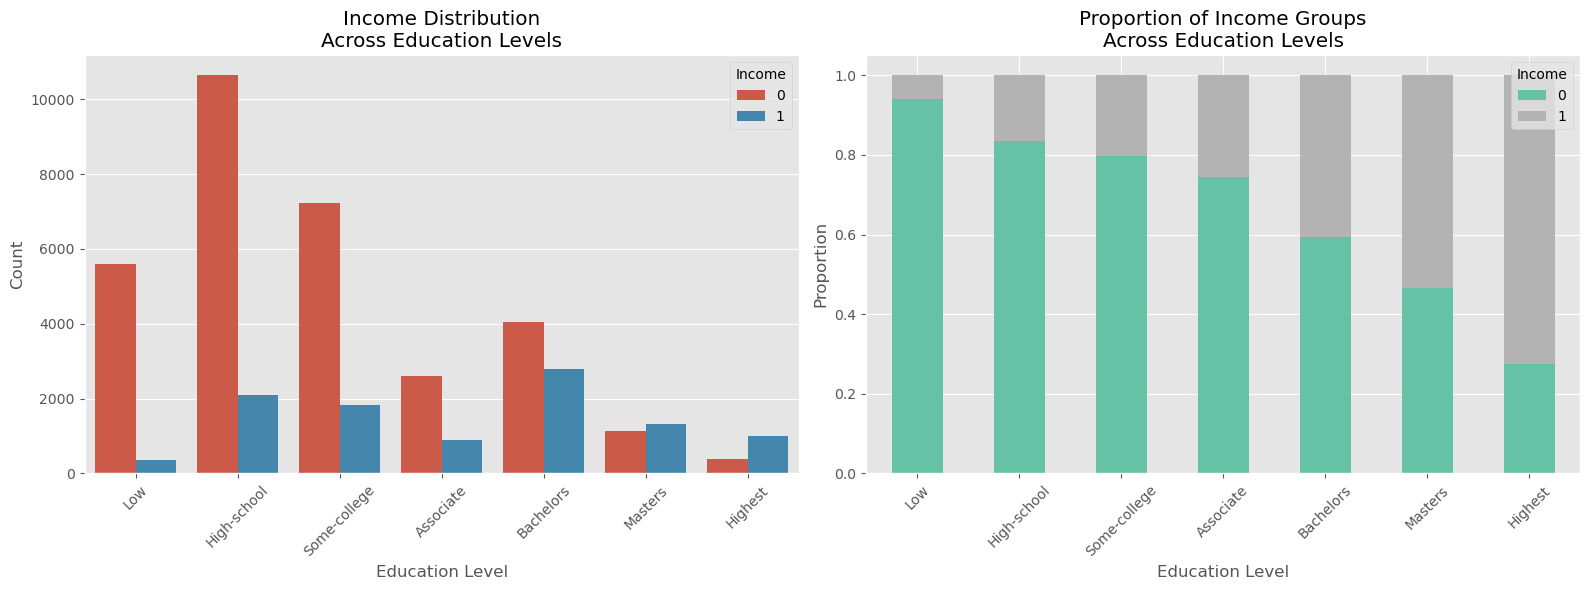

In [41]:
# Preparing proportional income distribution by education level

# Defining the education order for consistent display
edu_income_prop = df.groupby('education')['income'].value_counts(normalize=True).unstack().sort_values(1)
edu_order = edu_income_prop.index.tolist()

# Create side-by-side subplots (1 row, 2 charts)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns



# Left Chart: Count of income groups by education level
sns.countplot(data=df, x='education', hue='income', order=edu_order, ax=axes[0])
axes[0].set_title('Income Distribution\nAcross Education Levels')
axes[0].set_xlabel('Education Level')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Income')

# Right Chart: Proportional distribution of income groups by education
edu_income_prop.plot(kind='bar', stacked=True, colormap='Set2', ax=axes[1])
axes[1].set_title('Proportion of Income Groups\nAcross Education Levels')
axes[1].set_xlabel('Education Level')
axes[1].set_ylabel('Proportion')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Income')

# Adjust layout to avoid Overlapping
plt.tight_layout()
plt.show()     # display plots


### **Insights**
- Education is a strong predictor of income, but it must be interpreted through both absolute counts and proportional trends. The countplot reflects group size, while the proportion chart shows income chances within each level.  
- The countplot shows that Bachelor’s, High School, and Some College have the highest number of high-income earners in total.
- However, the proportional plot reveals that those in the Highest Group (Doctorate and Prof-School degrees) and Masters, have the highest chances of earning >50K.
- This difference highlights an important insight: **Higher education increases the probability of earning more, even if fewer people attain those degrees.**

### **Work Hour Patterns by Income Group: Boxplot and Distribution Analysis**

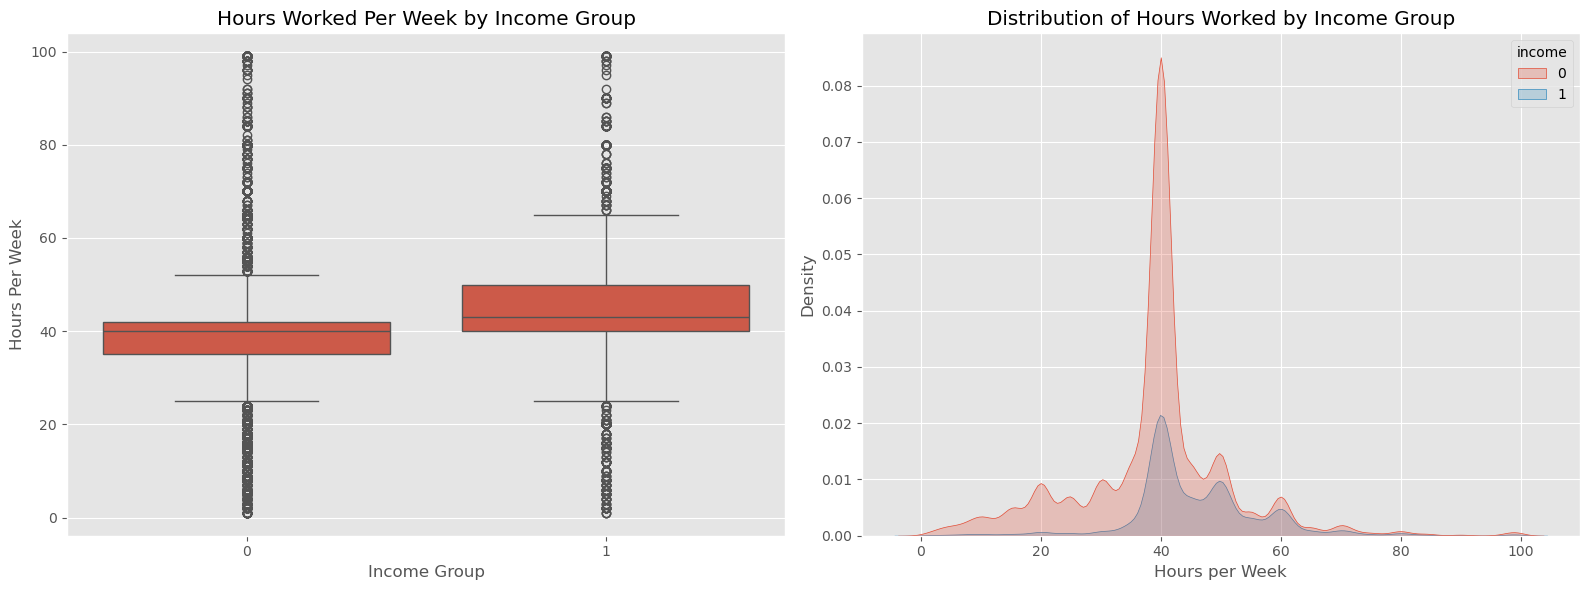

In [42]:

# Set up side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Plot 1: Boxplot comparing hours worked per week across income groups
sns.boxplot(data=df, x='income', y='hours_per_week', ax=axes[0])
axes[0].set_title('Hours Worked Per Week by Income Group')
axes[0].set_xlabel('Income Group')
axes[0].set_ylabel('Hours Per Week')

# Plot 2: KDE plot showing distribution of hours worked by income group
sns.kdeplot(data=df, x='hours_per_week', hue='income', fill=True, ax=axes[1])
axes[1].set_title('Distribution of Hours Worked by Income Group')
axes[1].set_xlabel('Hours per Week')
axes[1].set_ylabel('Density')

# Layout adjustments
plt.tight_layout()
plt.show()


### **Insight**  

- The comparison of hours worked per week across income groups reveals that while most individuals in both groups work around 40 hours, those earning >50K tend to work longer and more variable hours.
- The boxplot highlights that high earners have a slightly higher median and more outliers, suggesting extended work hours or flexible schedules.
- The KDE plot shows a longer right tail for the >50K group, indicating a greater share of them work 50–70+ hours per week.
- Together, these plots suggest that although 40 hours is the baseline, **working longer hours is more common among higher earners, making it a modest but noticeable contributor to income differences.**




### **Capital Gain Patterns by Income Group: Distribution and Binary Presence**

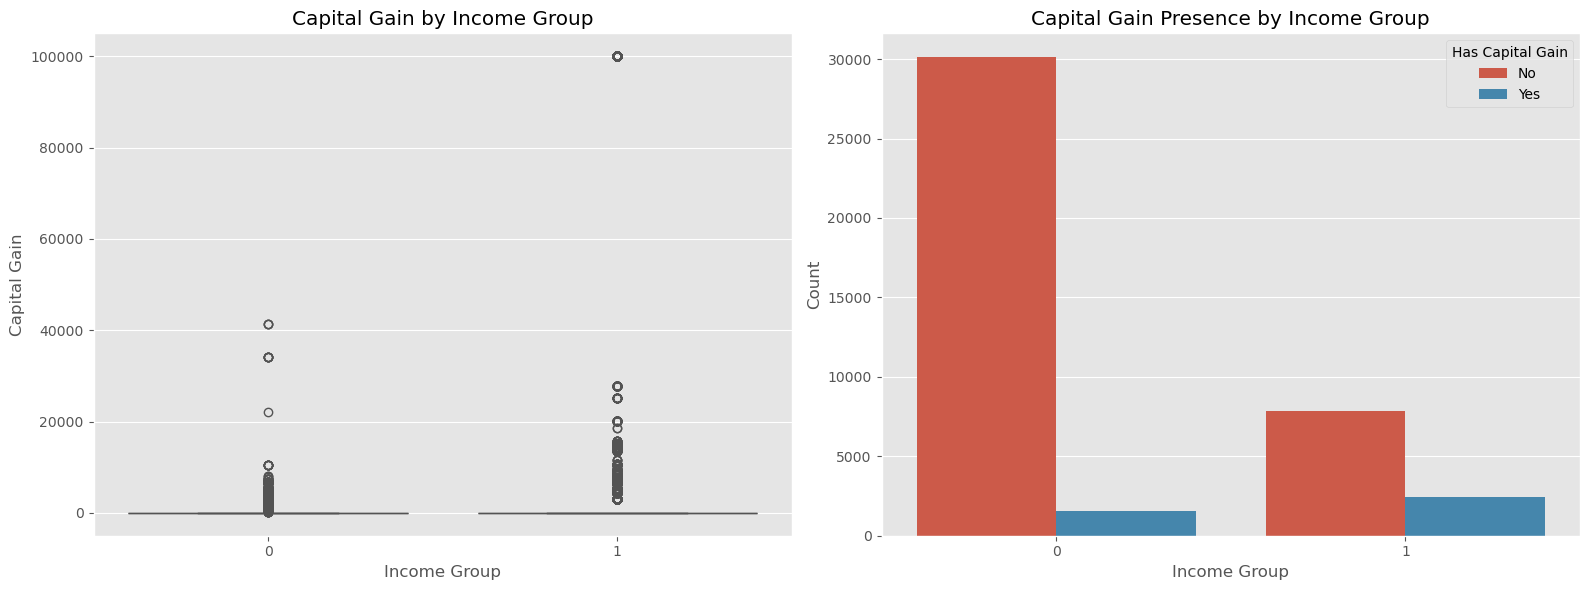

In [43]:
# Create a binary flag for whether capital gain is greater than 0
df['has_capital_gain'] = df['capital_gain'].apply(lambda x: 1 if x > 0 else 0)

# Set up side-by-side subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Boxplot showing capital gain distribution by income group
sns.boxplot(data=df, x='income', y='capital_gain', ax=axes[0])
axes[0].set_title('Capital Gain by Income Group')
axes[0].set_xlabel('Income Group')
axes[0].set_ylabel('Capital Gain')

# Plot 2: Countplot showing presence/absence of capital gain by income group
sns.countplot(data=df, x='income', hue='has_capital_gain', ax=axes[1])
axes[1].set_title('Capital Gain Presence by Income Group')
axes[1].set_xlabel('Income Group')
axes[1].set_ylabel('Count')
axes[1].legend(title='Has Capital Gain', labels=['No', 'Yes'])

# Adjust layout
plt.tight_layout()
plt.show()


### **Insight**  

- The boxplot shows that while most individuals in both income groups have zero capital gain, the >50K group includes a significant number of individuals with large capital gains, visible through the extended upper range and outliers.
- The accompanying bar chart reinforces this by showing that individuals with capital gains are far more likely to be in the >50K income group. Although capital gains are rare overall, their presence is strongly associated with higher income.
- Together, these charts suggest that **capital gain is a high-impact but low-frequency indicator of wealth and plays an important role in distinguishing higher earners in the dataset.**



### **Income Distribution by Workclass: Count and Proportional Analysis**

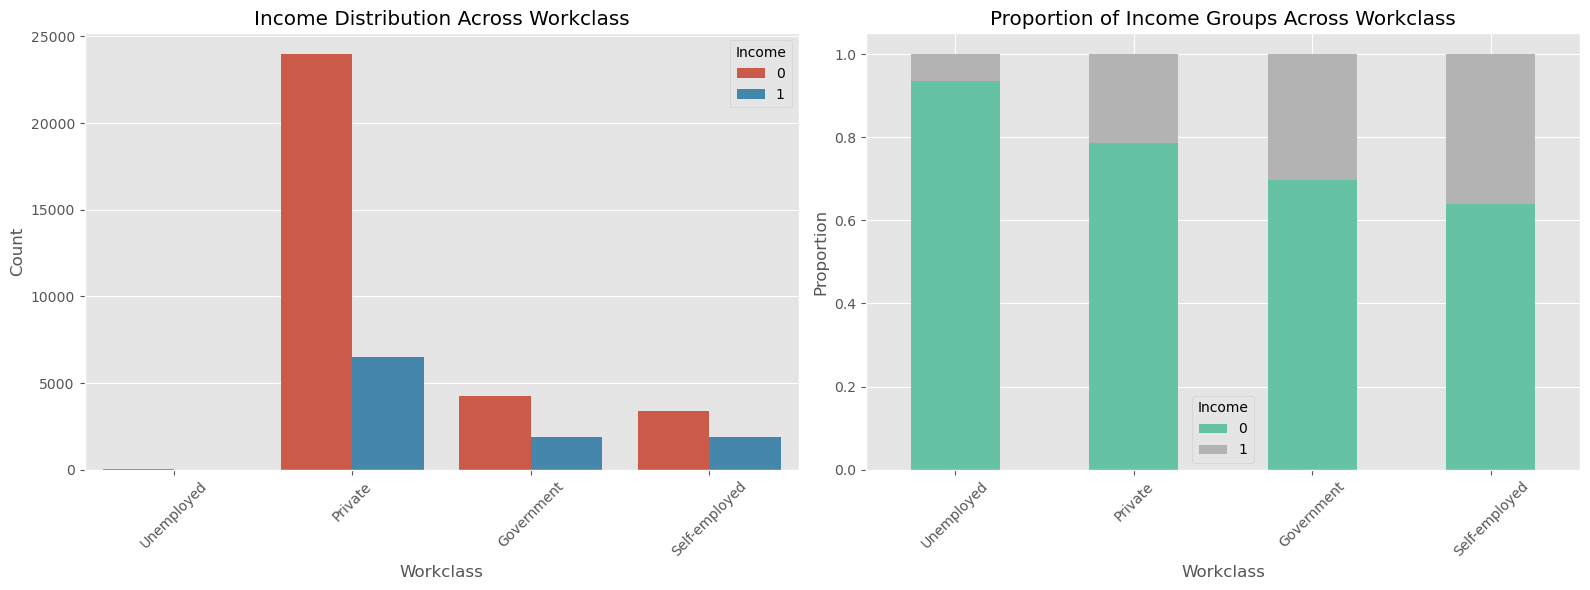

In [44]:

# Calculate income proportions by workclass and sort by high-income share
work_income_prop = df.groupby('workclass')['income'].value_counts(normalize=True).unstack().sort_values(1)

# Define custom order based on >50K proportion
work_order = work_income_prop.index.tolist()  # Ordered by >50K proportion

# Set up side-by-side subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Countplot showing raw income counts by workclass
sns.countplot(data=df, x='workclass', hue='income', order=work_order, ax=axes[0])
axes[0].set_title('Income Distribution Across Workclass')
axes[0].set_xlabel('Workclass')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Income')

# Plot 2: Stacked bar chart of income proportions by workclass
work_income_prop.plot(kind='bar', stacked=True, colormap='Set2', ax=axes[1])
axes[1].set_title('Proportion of Income Groups Across Workclass')
axes[1].set_xlabel('Workclass')
axes[1].set_ylabel('Proportion')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Income')

# Final layout
plt.tight_layout()
plt.show()


### **Insight**  

- The countplot shows that most individuals in the dataset work in the Private sector, which also contributes the highest number of >50K earners simply due to its size.
- However, the proportional chart reveals a clearer pattern: Self-employed and Goverment individuals are more likely to earn >50K than those in the Private sector. This contrast shows why it's important to consider both volume and proportion.
- **While the Private sector dominates in count, higher income likelihood is stronger in other workclasses (Self-employed and Goverment)**. Together, these charts suggest that work sector influences income, not just in raw numbers, but in income potential within each sector.


### **Income Distribution by Marital Status: Count and Proportional Comparison**

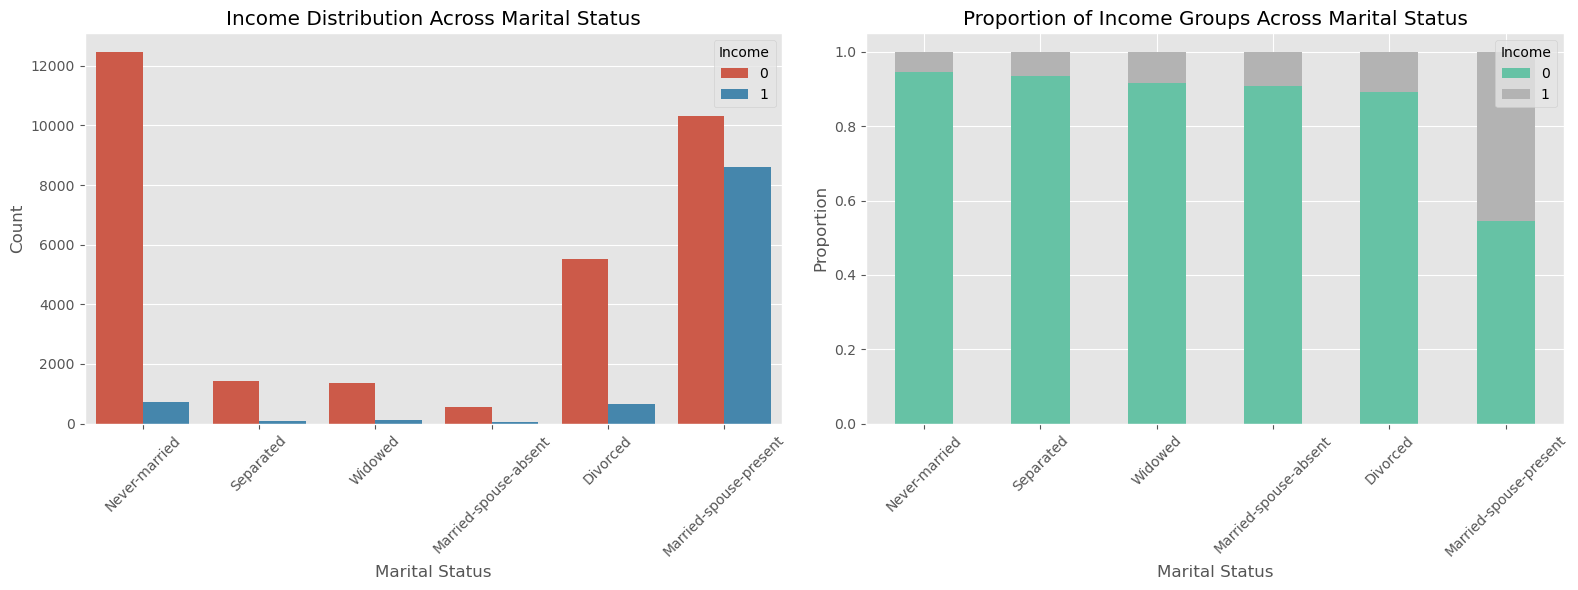

In [45]:
# Calculate income proportions by marital status and sort by >50K share
marital_income_prop = df.groupby('marital_status')['income'].value_counts(normalize=True).unstack().sort_values(1)

# Define plotting order based on high-income proportion
marital_order = marital_income_prop.index.tolist()  # Ordered by >50K proportion

# Set up side-by-side subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Countplot showing income count by marital status
sns.countplot(data=df, x='marital_status', hue='income', order=marital_order, ax=axes[0])
axes[0].set_title('Income Distribution Across Marital Status')
axes[0].set_xlabel('Marital Status')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Income')

# Plot 2: Stacked bar chart of income proportions by marital status
marital_income_prop.plot(kind='bar', stacked=True, colormap='Set2', ax=axes[1])
axes[1].set_title('Proportion of Income Groups Across Marital Status')
axes[1].set_xlabel('Marital Status')
axes[1].set_ylabel('Proportion')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Income')

# Layout adjustment
plt.tight_layout()
plt.show()


### **Insight**  

- The countplot shows that Married-Spouse-Present is the most common marital status in the dataset and contributes the largest number of >50K earners.
- The proportional bar chart reaffirms this that individuals who are Married-Spouse-Present are much more likely to earn >50K compared to those who are Divorced, Separated, or Never-Married. While other groups (like Never-Married) appear frequently, their proportion of high-income earners is much lower.
- **Together, these charts show a link between marital stability and higher income, possibly due to dual incomes or shared responsibilities.**




### **Income Distribution and Proportions by Sex, Race, and Native Country**

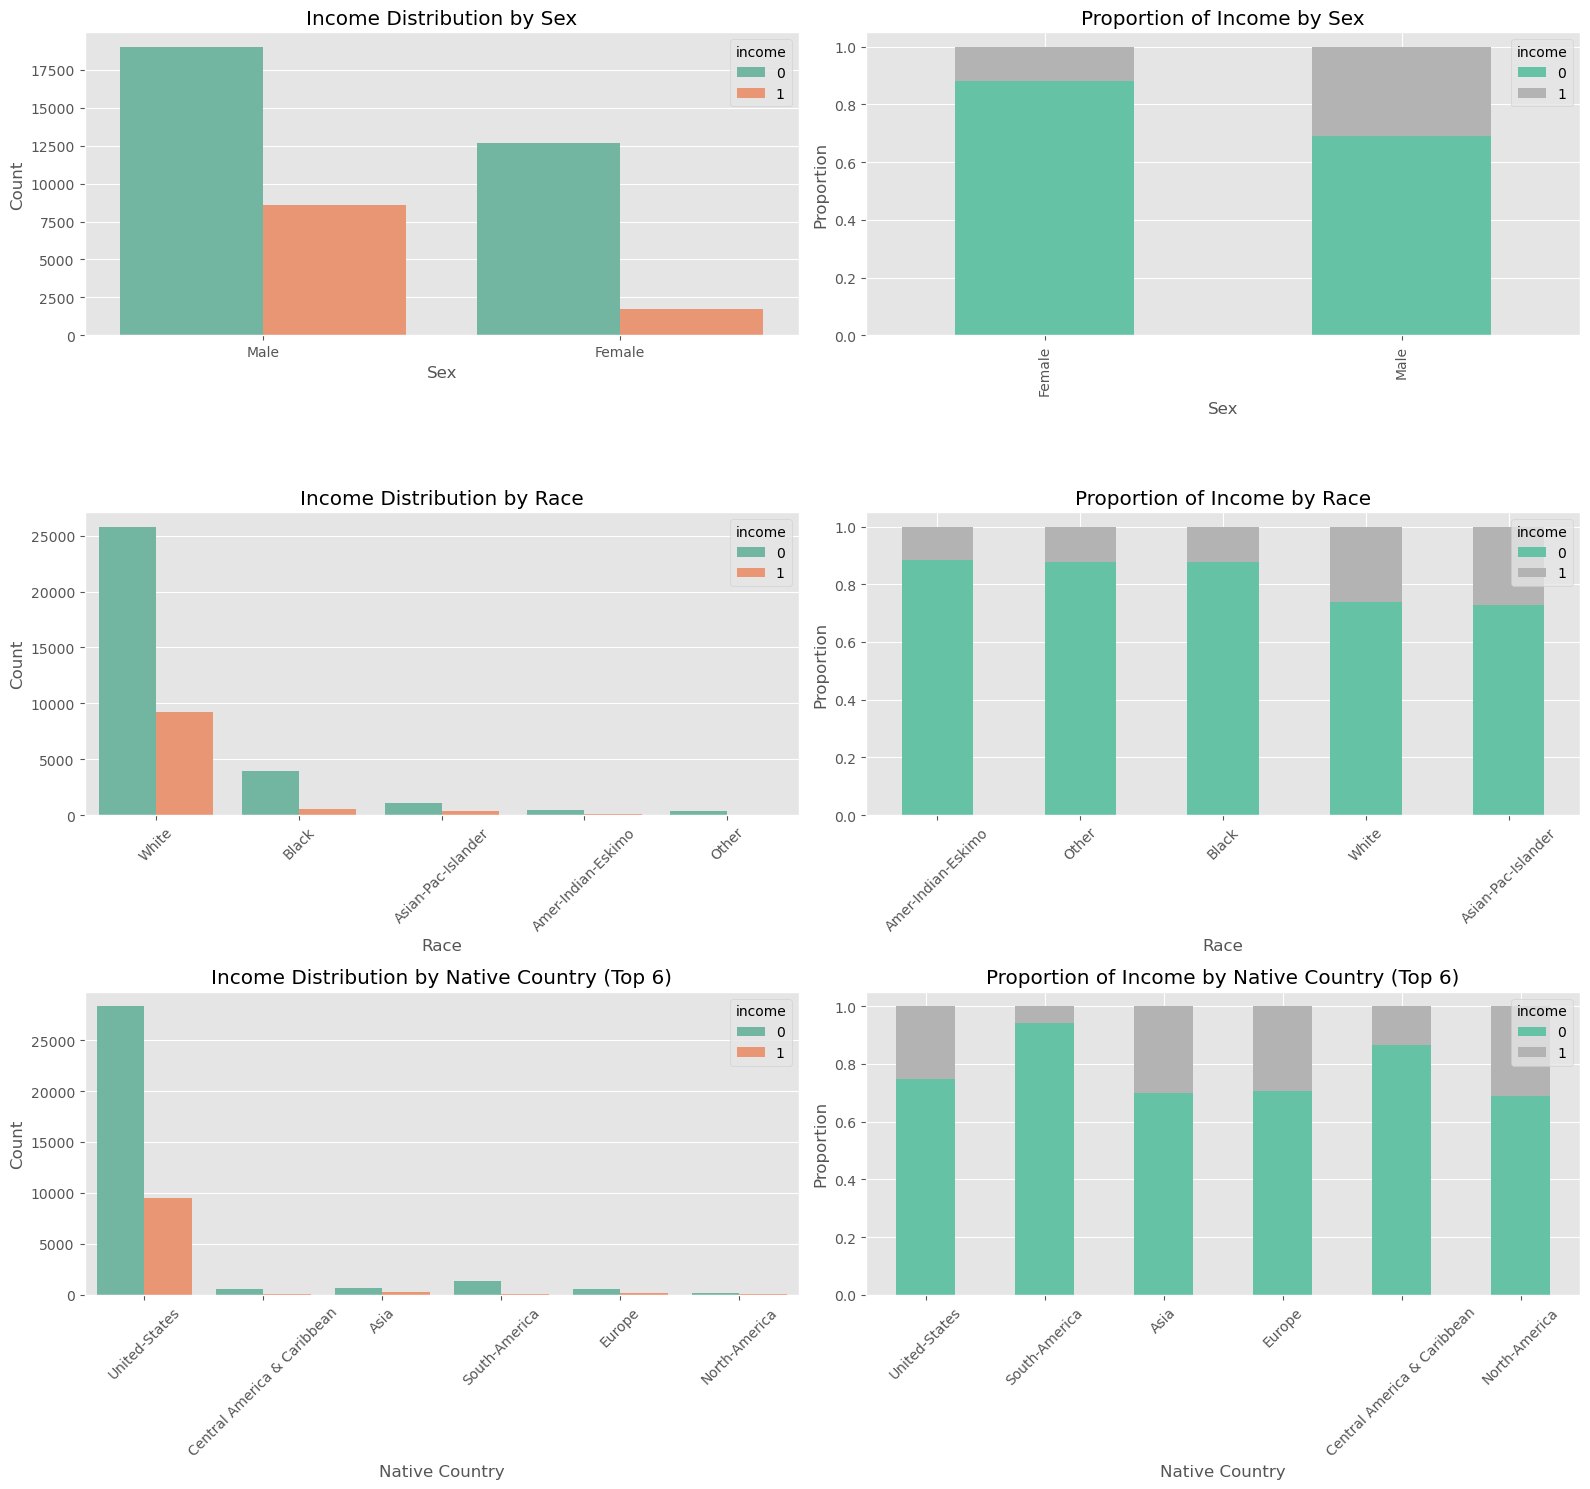

In [46]:


# Compute proportional income distributions by sex and race
sex_prop = df.groupby('sex')['income'].value_counts(normalize=True).unstack().sort_values(1)
race_prop = df.groupby('race')['income'].value_counts(normalize=True).unstack().sort_values(1)

# Filter top 6 most frequent countries for clarity
top_countries = df['native_country'].value_counts().index[:6]
df_filtered = df[df['native_country'].isin(top_countries)]
# Compute proportional income distribution for top countries
country_prop = df_filtered.groupby('native_country')['income'].value_counts(normalize=True).unstack().loc[top_countries]

# Create 3x2 grid for subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 15))

# Row 1: Sex
# Countplot
sns.countplot(data=df, x='sex', hue='income', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Income Distribution by Sex')
axes[0, 0].set_xlabel('Sex')
axes[0, 0].set_ylabel('Count')

# Proportion plot
sex_prop.plot(kind='bar', stacked=True, ax=axes[0, 1], colormap='Set2')
axes[0, 1].set_title('Proportion of Income by Sex')
axes[0, 1].set_xlabel('Sex')
axes[0, 1].set_ylabel('Proportion')

# Row 2: Race
# Count plot
sns.countplot(data=df, x='race', hue='income', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Income Distribution by Race')
axes[1, 0].set_xlabel('Race')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# Proportion plot
race_prop.plot(kind='bar', stacked=True, ax=axes[1, 1], colormap='Set2')
axes[1, 1].set_title('Proportion of Income by Race')
axes[1, 1].set_xlabel('Race')
axes[1, 1].set_ylabel('Proportion')
axes[1, 1].tick_params(axis='x', rotation=45)

# Row 3: Native Country (Top 6)
# Countplot
sns.countplot(data=df_filtered, x='native_country', hue='income', ax=axes[2, 0], palette='Set2')
axes[2, 0].set_title('Income Distribution by Native Country (Top 6)')
axes[2, 0].set_xlabel('Native Country')
axes[2, 0].set_ylabel('Count')
axes[2, 0].tick_params(axis='x', rotation=45)

# Proportion plot
country_prop.plot(kind='bar', stacked=True, ax=axes[2, 1], colormap='Set2')
axes[2, 1].set_title('Proportion of Income by Native Country (Top 6)')
axes[2, 1].set_xlabel('Native Country')
axes[2, 1].set_ylabel('Proportion')
axes[2, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### **Insights**

**Demographics and Income**
- Males, Whites, and U.S. natives dominate the dataset in size.
- Men are more likely to earn >50K, but race and nationality show less consistent patterns.
- Interestingly, some non-U.S. countries (like in North America, Asia, Europe) have high income proportions despite low counts.
- These features are imbalanced, but still capture useful income signals, especially when combined with other variables.





### **Multivariate Analysis**

### **Proportion of High Earners by Age Group and Education Level**

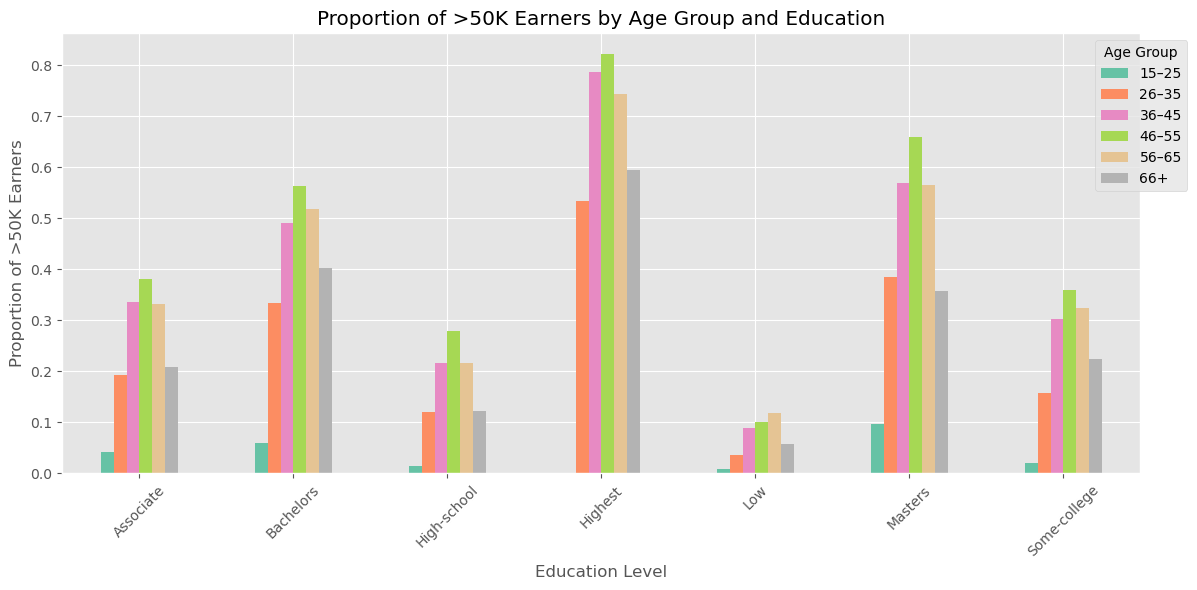

In [47]:
# Create categorical age groups from age column
df['age_group'] = pd.cut(df['age'], bins=[15, 25, 35, 45, 55, 65, 90],
                         labels=['15–25', '26–35', '36–45', '46–55', '56–65', '66+'])

# Group by age group and education, then calculate income proportions
combo_prop = df.groupby(['age_group', 'education'])['income'].value_counts(normalize=True).unstack().fillna(0)

# Extract the proportion of individuals earning >50K
plot_data = combo_prop[1].unstack().T  # Education on x-axis

# Plot grouped bar chart
plot_data.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title('Proportion of >50K Earners by Age Group and Education')    # setting plot title
plt.ylabel('Proportion of >50K Earners')                              # Label y-axis
plt.xlabel('Education Level')                                         # Label x-axis
plt.xticks(rotation=45)                                               # Rotate x-axis labels for clarity
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1))               # Position legend outside the plot
plt.tight_layout()
plt.show()


### **Insight**  
- Income rises with both age and education level.
- Those aged 36–65 with higher education are most likely to earn >50K.
- Younger individuals, even with degrees, tend to earn less showing that education alone isn’t enough early on.
- **Experience (age) combined with education is a strong driver of income potential.**

### **Proportion of High Earners by Workclass and Sex**

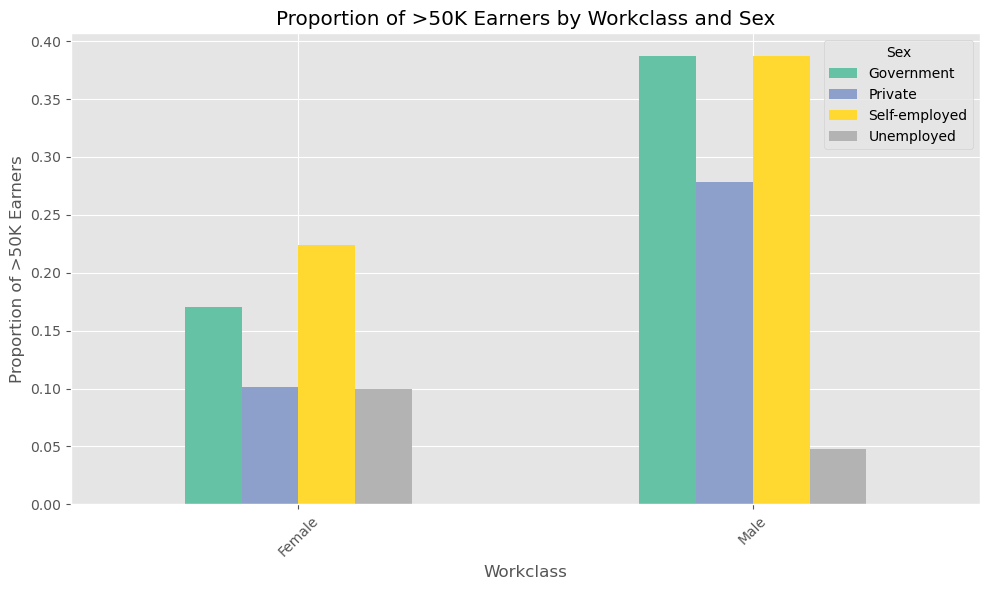

In [48]:
# Calculate income proportion by workclass and sex
gender_job = df.groupby(['workclass', 'sex'])['income'].value_counts(normalize=True).unstack().fillna(0)

# Extract the proportion of individuals earning >50K
plot_data = gender_job[1].unstack().T  # workclass on x, bars = male/female

# Plot grouped bar chart
plot_data.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title('Proportion of >50K Earners by Workclass and Sex')
plt.ylabel('Proportion of >50K Earners')
plt.xlabel('Workclass')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.tight_layout()
plt.show()


### **Insight**
- Across nearly all work sectors, men are more likely to earn >$50K than women, reflecting a clear gender-based income gap.
- Despite being underrepresented in the dataset, women have nearly twice the unemployment rate compared to men.
- **These trends point to both pay and opportunity disparities between genders across sectors.**



## **DATA PREPROCESSING AND FEATURE ENGINEERING**

### Exploring the current state of the dataset and dropping columns I will not be needing

In [49]:
# viewing current columns in the dataset
df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income',
       'has_capital_gain', 'age_group'],
      dtype='object')

In [50]:
#DROPPING COLUMNS I WILL NOT BE NEEDING FOR MY MODEL DEVELOPMENT

# Columns to drop
drop_cols = ['age_group', 'has_capital_gain', 'education_num']

# Drop them from the dataset and assigning the remaining columns to a new dataframe for my modeling also to preserve the cleaned dataset
df_model = df.drop(columns=drop_cols)

# Confirm the change
print("Remaining columns after drop:\n", df_model.columns.tolist())

#Replacing the sex column to 0/1 since its values are binary (Male and Female)
# REPLACING THE MALE AND FEMALE FROM SEX COLUMNS TO 0 AND 1 for easy model development since the column is alrea

df_model['sex'] = df_model['sex'].replace({'Male': 0, 'Female': 1})
print()

# Confirming the sex columns is now binary and numerical
display("New Sex Unique Values", df_model['sex'].unique())


Remaining columns after drop:
 ['age', 'workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']



'New Sex Unique Values'

array([0, 1])

### **Columns I dropped and why**

**age_group**: Binned version of age; less precise and redundant.

**has_capital_gain**: Derived from capital_gain; adds no new information.

**fnlwgt**: Survey weight, not a real feature; may introduce bias and noise. (already dropped at the beginning of the project before EDA)

**education_num**: Duplicate of education; using both may cause overemphasis or redundancy which in turn leads to overfitting.


### **Preprocessing Pipeline**

In [51]:
# Separating columns into Independent Variables(features-'X') and dependent variable (target-'y')
X = df_model.drop('income', axis=1)
y = df_model['income']



# Identify column groups from the Independente Variables: X for easy preprocessing
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = ['age', 'capital_gain', 'capital_loss', 'hours_per_week']   # not including sex here since i have already converted it to binary

# Custom preprocessing transformation functions

# Log-transform skewed capital gain/loss features to reduce extreme skew
def log_transform(X):
    X = X.copy()
    X['capital_gain'] = np.log1p(X['capital_gain'])
    X['capital_loss'] = np.log1p(X['capital_loss'])
    return X

# Cap extreme values in hours_per_week to reduce outlier influence
def cap_hours(X):
    X = X.copy()
    cap = X['hours_per_week'].quantile(0.99)
    X['hours_per_week'] = X['hours_per_week'].clip(upper=cap)
    return X

# Building Preprocessing pipelines

# Pipeline for numerical columns: log transform → cap outliers → scale
numerical_preprocessing = Pipeline(steps=[
    ('log_transform', FunctionTransformer(log_transform, validate=False)),
    ('cap_hours', FunctionTransformer(cap_hours, validate=False)),
    ('scaler', StandardScaler())
])

# Pipeline for categorical columns: one-hot encode, drop first to avoid multicollinearity
categorical_preprocessing = OneHotEncoder(drop='first', sparse_output=False)

# Combining Categorical and Numerical preprocessing in a ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_preprocessing, numerical_cols),
    ('cat', categorical_preprocessing, categorical_cols)
], remainder='passthrough')  # Pass through 'sex' which is already numeric


# Final preprocessing pipeline
full_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor)
])

# Split data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform
# Fit the preprocessing pipeline on the training data and transform both sets
X_train_processed = full_pipeline.fit_transform(X_train)
X_test_processed = full_pipeline.transform(X_test)

# Preview Output Shapes
print("X_Training set shape:", X_train_processed.shape)
print("X_Test set shape:", X_test_processed.shape, '\n')


# Checking that the number of samples/rows in features and labels match for both train and test sets
print("Training/Test Sample Size Validation")
print(X_train.shape[0]==y_train.shape[0])
print(X_test.shape[0]==y_test.shape[0])




X_Training set shape: (33550, 47)
X_Test set shape: (8388, 47) 

Training/Test Sample Size Validation
True
True


### Preprocessing Summary

The preprocessing pipeline was applied only to the feature set `X`, not the target variable `y`.

- `X` required transformations such as **log transformation**, **outlier capping**, **scaling**, and **one-hot encoding** to prepare it for modeling.
- The `sex` column, already numeric and clean, was passed through without modification.
- `y` (income) was already encoded as **0 and 1**, making it suitable for classification.
- Since `y` is the target variable and already numeric, no transformation was necessary or appropriate.
- To avoid data leakage, I made all the learning and fitting and transformations of the preprocessing steps to be only on the X-train and then only transform on the X_test. So that only the training data learnt and the test data is left unseen untill model evaluation.


### **MODEL DEVELOPMENT**

### **Baseline Models**

In [52]:
# Creating a function for my baseline model
# This function takes in a trained model and test data,
# evaluates its performance using multiple metrics,
# and displays a confusion matrix and ROC curve.


def evaluate_model(model, name, X_train, y_train, X_test, y_test, color='blue'):

    print(f"\nEvaluating: {name}")

    # Fit the model
    model.fit(X_train, y_train)

    # General Predictions
    y_pred = model.predict(X_test)                # class predictions
    y_proba = model.predict_proba(X_test)[:, 1]   # Probabilities for positive class

    # Computing Evaluation Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    #Displaying Evaluation Metrics
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {auc:.4f}")
    print("\n Classification Report:\n", classification_report(y_test, y_pred))

    # Plottting Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # Plotting ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})", color=color)
    plt.plot([0, 1], [0, 1], 'k--', alpha=0.6)
    plt.title(f"{name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # returning evaluation results
    return {
        'model': model,
        'name': name,
        'y_pred': y_pred,
        'y_proba': y_proba,
        'auc': auc,
        'fpr': fpr,
        'tpr': tpr
    }

### **Running Baseline Models**

### **1. LOGISTIC REGRESSION MODEL**


Evaluating: Logistic Regression
Accuracy: 0.8337
Precision: 0.7085
Recall: 0.5628
F1 Score: 0.6273
ROC AUC: 0.8946

 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      6302
           1       0.71      0.56      0.63      2086

    accuracy                           0.83      8388
   macro avg       0.79      0.74      0.76      8388
weighted avg       0.83      0.83      0.83      8388



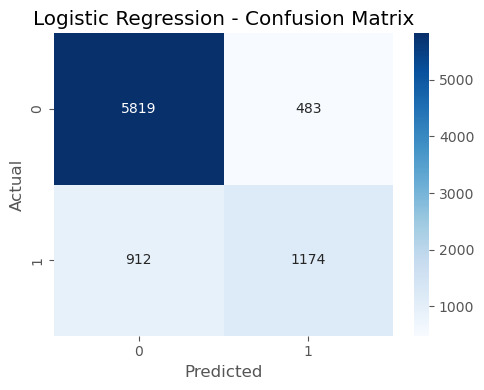

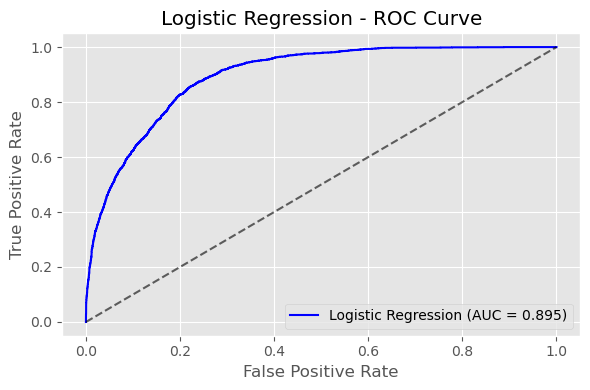

In [53]:
# LOGISTIC REGRESIION

# Initialize the Logistic Regression model
log_reg = LogisticRegression(
    max_iter=1000,      # Increase max iterations to ensure convergence
    random_state=42     # Set seed for reproducibility
)

# Evaluate the model using the custom evaluation function
results_log_reg = evaluate_model(
    model=log_reg,
    name="Logistic Regression",
    X_train=X_train_processed,         # Training features
    y_train=y_train,                   # Training labels
    X_test=X_test_processed,           # Test features
    y_test=y_test,                     # Test labels
    color='blue'                       # ROC Curve Color
)



### **Interpretation For Baseline Logistic Regression Model**

- The baseline Logistic Regression model achieved an overall accuracy of 83.4% and a strong ROC AUC of 0.8946, indicating excellent ability to distinguish between income levels.
- While the model performs very well on the majority class (income ≤50K), its recall for the minority class (income >50K) is relatively low at 56%, meaning it misses a significant portion of true high-income earners.
- Precision for this group stands at 71%, and the F1 score is 0.63, suggesting a moderate balance between identifying and correctly predicting high-income individuals.
- These results reflect the underlying class imbalance in the dataset, which causes the model to favor the majority class.
- Overall, while the model shows strong general performance, it leaves room for improvement in detecting minority class cases.

### **2. RANDOM FOREST MODEL**


Evaluating: Random Forest
Accuracy: 0.8219
Precision: 0.6614
Recall: 0.5815
F1 Score: 0.6189
ROC AUC: 0.8775

 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88      6302
           1       0.66      0.58      0.62      2086

    accuracy                           0.82      8388
   macro avg       0.76      0.74      0.75      8388
weighted avg       0.82      0.82      0.82      8388



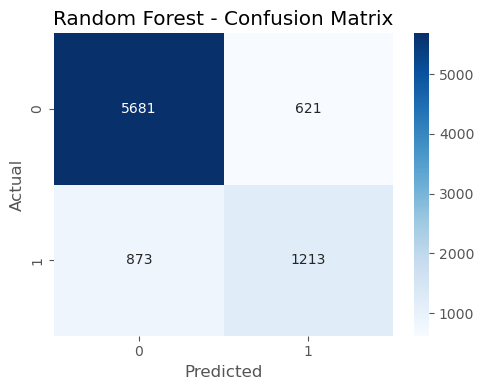

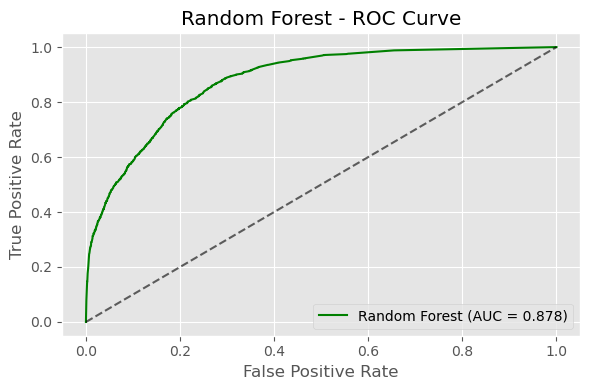

In [54]:
# RANDOM FOREST

# n_estimators=100: Start with 100 trees
# random_state=42: For reproducibility
# n_estimators will later be tuned in GridSearchCV

# Initializing the Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Evaluate the model using the custom evaluation function
results_rf = evaluate_model(
    model=rf,
    name="Random Forest",
    X_train=X_train_processed,
    y_train=y_train,
    X_test=X_test_processed,
    y_test=y_test,
    color='green'
)



### **Intrepretation of the Random Forest Baseline Model**  

- The baseline Random Forest model achieved an accuracy of 82.2% and a ROC AUC score of 0.8775, indicating strong overall predictive ability.
- While it performs well on the majority class (income ≤50K), it shows moderate performance in identifying the minority class (income >50K), with a precision of 66%, recall of 58%, and an F1 score of 0.62.
- This suggests that while the model is fairly accurate in identifying high-income individuals, it still misses a notable portion of them.
- The model reflects the class imbalance in the dataset, slightly favoring the majority class but showing a slightly better recall than the logistic regression baseline.
- Overall, it offers solid performance but still leaves room for improvement, especially in capturing more high-income earners.

### **3. XGBOOST MODEL**


Evaluating: XGBoost
Accuracy: 0.8670
Precision: 0.7784
Recall: 0.6500
F1 Score: 0.7085
ROC AUC: 0.9267

 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      6302
           1       0.78      0.65      0.71      2086

    accuracy                           0.87      8388
   macro avg       0.83      0.79      0.81      8388
weighted avg       0.86      0.87      0.86      8388



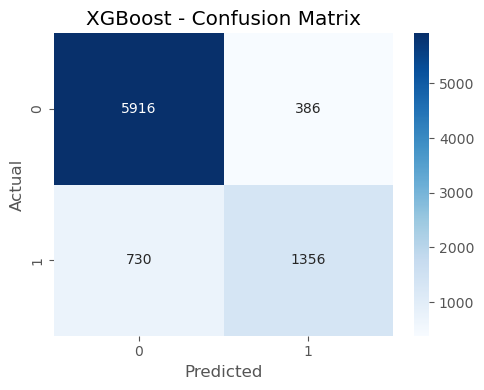

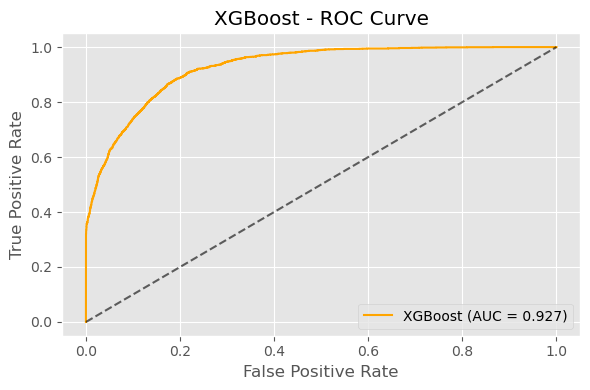

In [55]:
# XGBoost
# use_label_encoder=False prevents deprecation warnings
# eval_metric='logloss' is standard for binary classification
# random_state=42 keeps it reproducible

# Initializing the XGBosst Model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)   # initializing the model by creating an object for it

# Evaluate the model using the custom evaluation function
results_xgb = evaluate_model(
    model=xgb,
    name="XGBoost",
    X_train=X_train_processed,
    y_train=y_train,
    X_test=X_test_processed,
    y_test=y_test,
    color='orange'
)



### **Interpretations for the Baseline XGBoost Model**  

- The baseline XGBoost model delivered strong performance, achieving an accuracy of 86.7% and an excellent ROC AUC score of 0.9267, indicating high capability in distinguishing between income classes.
- For the minority class (income >50K), the model achieved a precision of 77.8%, recall of 65%, and an F1 score of 0.71, showing a solid balance between correctly identifying and predicting high-income individuals.
- Compared to the previous baseline models, XGBoost significantly improved recall and overall minority class performance while maintaining high precision and accuracy across both classes.
- This makes it the best-performing baseline model so far in terms of both general and minority class predictions.

### **Feature Importance for XGBoost**

                                       Feature  Importance
14       marital_status_Married-spouse-present      0.3515
10                               education_Low      0.1057
1                                 capital_gain      0.0711
9                            education_Highest      0.0360
2                                 capital_loss      0.0349
8                        education_High-school      0.0325
24                    occupation_Other-service      0.0280
21                  occupation_Farming-fishing      0.0249
11                           education_Masters      0.0206
20                  occupation_Exec-managerial      0.0203
44                native_country_South-America      0.0178
33                      relationship_Own-child      0.0161
7                          education_Bachelors      0.0153
31                  relationship_Not-in-family      0.0147
12                      education_Some-college      0.0142
22                occupation_Handlers-cleaners      0.01

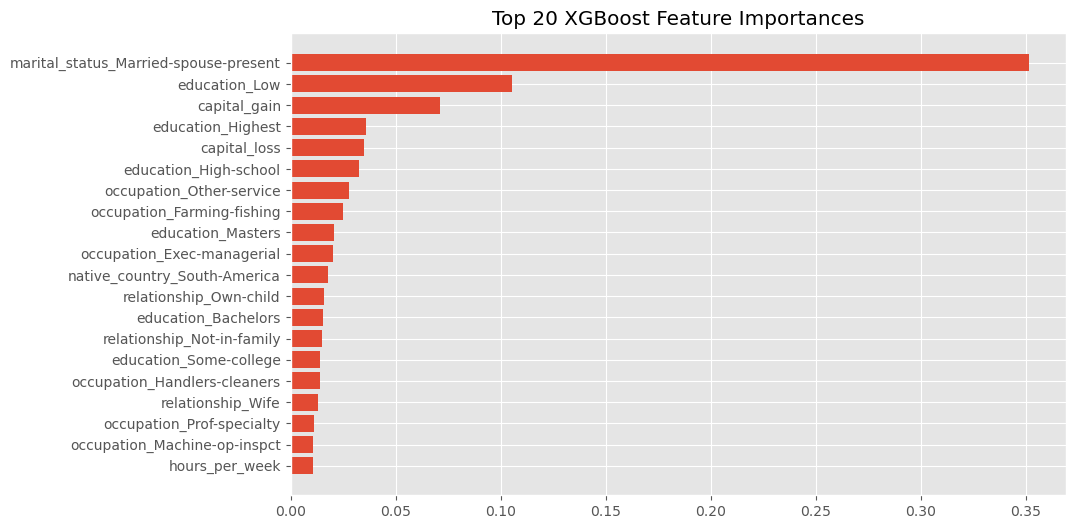

In [57]:
# Get feature names from pipeline
# Step 1: get names of numeric columns after pipeline
num_features = numerical_cols  # stays the same (log & scaling don't change names)

# Step 2: get names of encoded categorical columns
ohe = full_pipeline.named_steps['preprocessing'].named_transformers_['cat']
cat_features = ohe.get_feature_names_out(categorical_cols)

# Step 3: combine numeric + categorical + any passthrough columns
# 'sex' is passed through directly in your pipeline
passthrough_cols = ['sex']  # adjust if more columns are passed through
feature_names = np.concatenate([num_features, cat_features, passthrough_cols])

# Train your XGBoost model (if not already trained)
# xgb_model = results_xgb['model']

# Get importances
importances = xgb_model.feature_importances_

# Build a DataFrame
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Show nicely rounded and more spacious
pd.set_option('display.max_rows', None)          # show all rows
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.4f}'.format)

print(feat_importance_df)

# Optional: plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.barh(feat_importance_df['Feature'][:20], feat_importance_df['Importance'][:20])
plt.gca().invert_yaxis()
plt.title('Top 20 XGBoost Feature Importances')
plt.show()


                                       Feature  Importance
14       marital_status_Married-spouse-present      0.3515
10                               education_Low      0.1057
1                                 capital_gain      0.0711
9                            education_Highest      0.0360
2                                 capital_loss      0.0349
8                        education_High-school      0.0325
24                    occupation_Other-service      0.0280
21                  occupation_Farming-fishing      0.0249
11                           education_Masters      0.0206
20                  occupation_Exec-managerial      0.0203
44                native_country_South-America      0.0178
33                      relationship_Own-child      0.0161
7                          education_Bachelors      0.0153
31                  relationship_Not-in-family      0.0147
12                      education_Some-college      0.0142
22                occupation_Handlers-cleaners      0.01

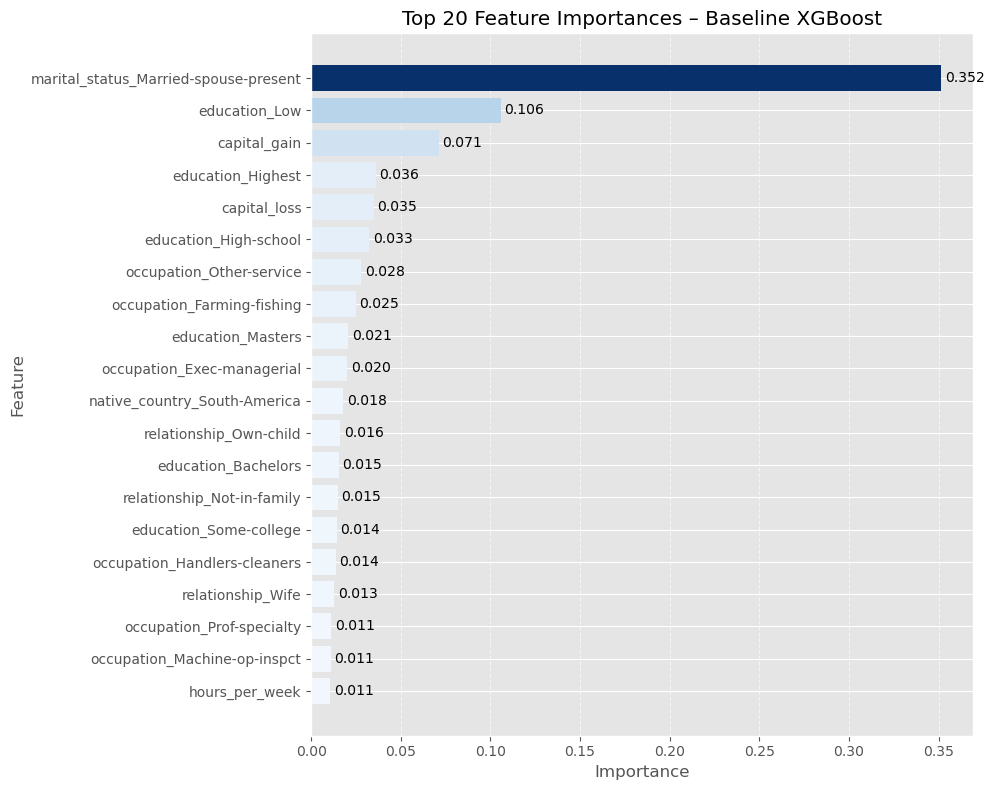

In [80]:
# === BASELINE XGBOOST FEATURE IMPORTANCE – FULL LIST + BEAUTIFUL CHART ===

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Build feature names exactly matching pipeline output
num_features = numerical_cols  # numeric columns
ohe = full_pipeline.named_steps['preprocessing'].named_transformers_['cat']
cat_features = ohe.get_feature_names_out(categorical_cols)

# Passthrough columns
passthrough_cols = ['sex']  # adjust if more columns passed through
feature_names = np.concatenate([num_features, cat_features, passthrough_cols])

# 2) Grab baseline XGBoost model importances
importances = xgb_model.feature_importances_

# 3) Build DataFrame
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 4) Display full list nicely
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.4f}'.format)

print(feat_importance_df)

# 5) Prepare top 20 features for beautiful horizontal chart
top_features = feat_importance_df.head(20).copy()
top_features = top_features.sort_values(by='Importance', ascending=True)
top_features['Importance_norm'] = top_features['Importance'] / top_features['Importance'].max()

# 6) Plot horizontal bar chart
plt.figure(figsize=(10, 8))
bars = plt.barh(
    y=top_features['Feature'],
    width=top_features['Importance'],
    color=plt.cm.Blues(top_features['Importance_norm'])
)

plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 20 Feature Importances – Baseline XGBoost")
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add value labels at the end of bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.002, bar.get_y() + bar.get_height()/2, f"{width:.3f}", va='center')

plt.tight_layout()
plt.show()


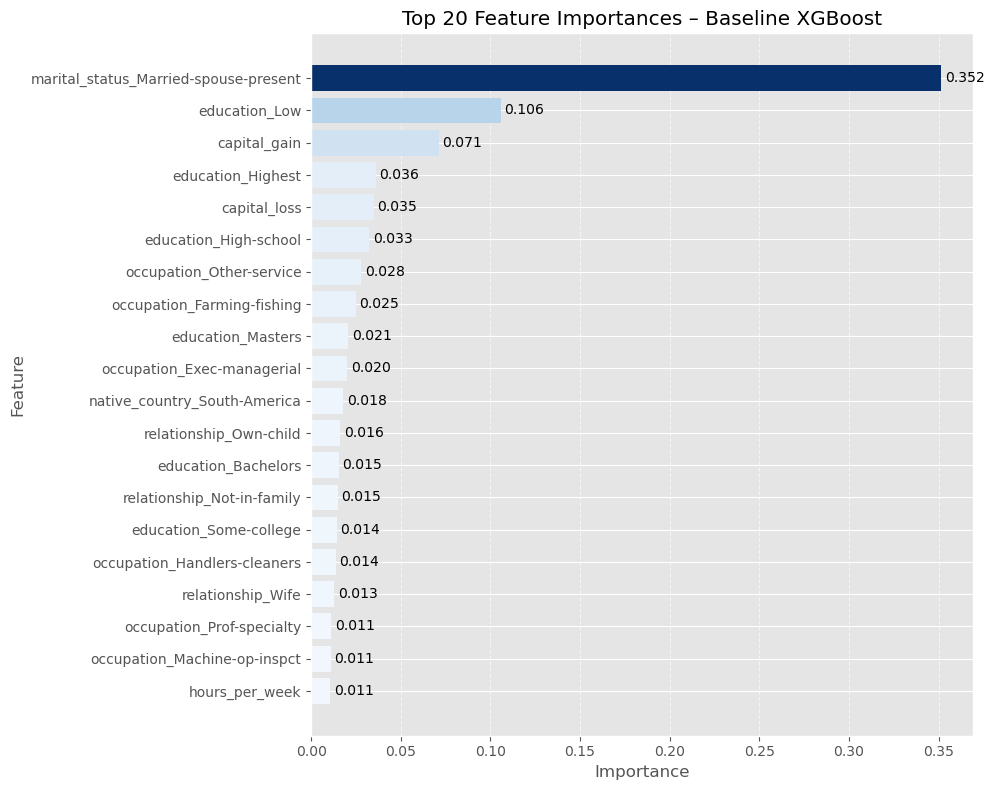

In [81]:
# === BEAUTIFUL HORIZONTAL CHART – BASELINE XGBOOST TOP 20 FEATURES ===

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Build feature names exactly matching pipeline output
num_features = numerical_cols
ohe = full_pipeline.named_steps['preprocessing'].named_transformers_['cat']
cat_features = ohe.get_feature_names_out(categorical_cols)
passthrough_cols = ['sex']  # adjust if more columns passed through
feature_names = np.concatenate([num_features, cat_features, passthrough_cols])

# Grab baseline XGBoost model importances
importances = xgb_model.feature_importances_

# Build DataFrame
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Prepare top 20 features
top_features = feat_importance_df.head(20).copy()
top_features = top_features.sort_values(by='Importance', ascending=True)  # for horizontal chart
top_features['Importance_norm'] = top_features['Importance'] / top_features['Importance'].max()

# Plot horizontal bar chart
plt.figure(figsize=(10, 8))
bars = plt.barh(
    y=top_features['Feature'],
    width=top_features['Importance'],
    color=plt.cm.Blues(top_features['Importance_norm'])
)

plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 20 Feature Importances – Baseline XGBoost")
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add value labels at the end of bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.002, bar.get_y() + bar.get_height()/2, f"{width:.3f}", va='center')

plt.tight_layout()
plt.show()


### **Insights**

- XGBoost revealed that marital status (being married with spouse present) is the single most influential feature, followed by education levels and capital gains. Occupation-related features also contributed meaningfully, while demographics like age, hours worked, and country of origin played smaller roles. This aligns with the expectation that family structure, education, and financial indicators are key determinants of income levels.  

- These results mirror my earlier EDA: the correlation heatmap flagged education, capital gains, hours worked, and age as top numeric drivers, while categorical analysis showed Married–Spouse–Present as the strongest group for >$50K earners. XGBoost picking up the same signals confirms the model is learning from the very patterns uncovered during exploration which is a reassuring validation of my data preparation and analysis approach.

### **4. SUPPORT VECTOR MACHINE MODEL**


Evaluating: SVM
Accuracy: 0.8479
Precision: 0.7637
Recall: 0.5623
F1 Score: 0.6477
ROC AUC: 0.8885

 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      6302
           1       0.76      0.56      0.65      2086

    accuracy                           0.85      8388
   macro avg       0.82      0.75      0.78      8388
weighted avg       0.84      0.85      0.84      8388



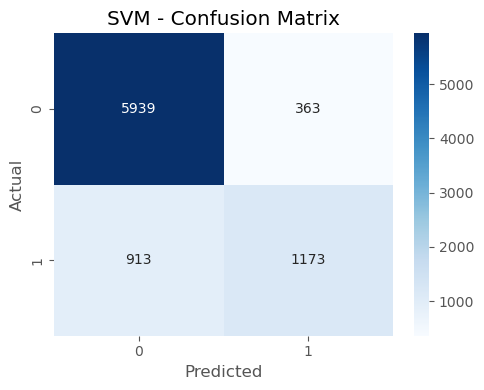

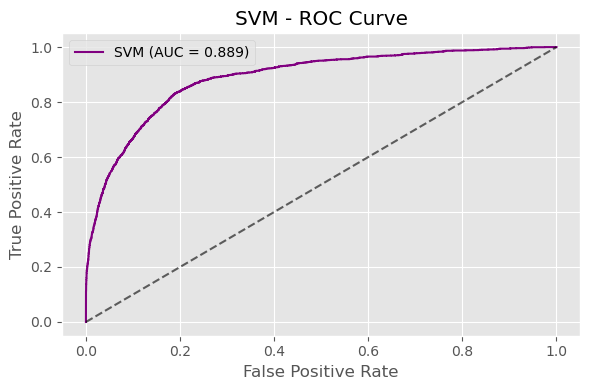

In [58]:
# SVM
#  probability=True is required because the model function uses predict_proba()
# kernel='rbf' is the default and works well for non-linear boundaries
# random_state=42 ensures reproducibility

# Initializing the SVM Model
svm = SVC(kernel='rbf', probability=True, random_state=42)

# Evaluate the model using the custom evaluation function
results_svm = evaluate_model(
    model=svm,
    name="SVM",
    X_train=X_train_processed,
    y_train=y_train,
    X_test=X_test_processed,
    y_test=y_test,
    color='purple'
)



### **Interpretations for SVM Baseline Model**  

- The baseline Support Vector Machine (SVM) model achieved an accuracy of 84.8% and a strong ROC AUC score of 0.8885, indicating good overall performance in separating income classes.
- For the minority class (income >50K), the model recorded a precision of 76.4%, a recall of 56.2%, and an F1 score of 0.65. This means it predicts high-income individuals with reasonable confidence but still misses a significant portion of them.
- While its recall is lower than XGBoost, it maintains high precision and solid accuracy.
- Overall, the SVM model shows reliable performance, particularly for correct predictions of high-income earners, though there is room for improving recall.

### **BASELINE Models COMPARISON**

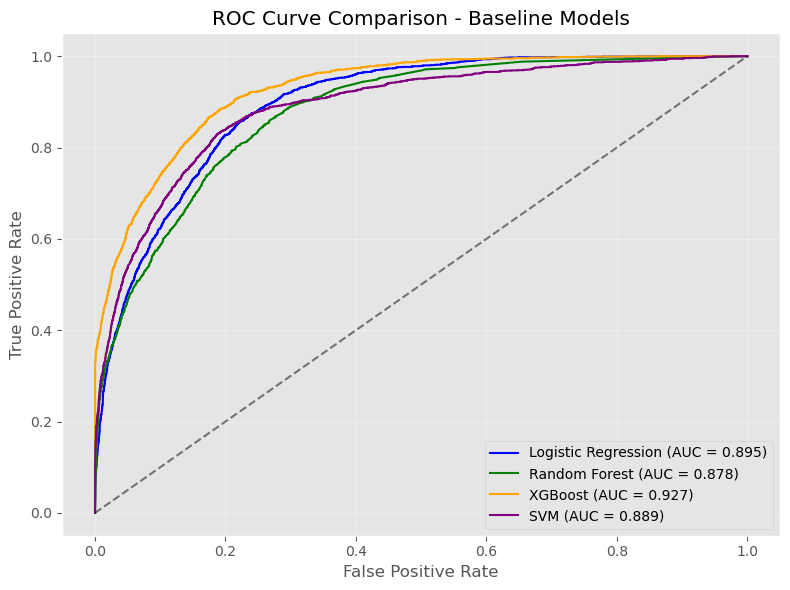

In [59]:
# COMPARING ALL THE MODELS

# Create the ROC comparison plot
plt.figure(figsize=(8, 6))

# List of all result objects and their curve colors
models = [
    (results_log_reg, 'blue'),
    (results_rf, 'green'),
    (results_xgb, 'orange'),
    (results_svm, 'purple'),
]

# Plot each model's ROC curve
for result, color in models:
    plt.plot(result['fpr'], result['tpr'],
             label=f"{result['name']} (AUC = {result['auc']:.3f})",
             color=color)

# Diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)

# Chart details
plt.title("ROC Curve Comparison - Baseline Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### Tabular Comparison

In [60]:
# import pandas as pd
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Compute metrics from stored predictions
baseline_results = []

# A helper function to compute metrics from stored results
def get_metrics(result, y_true):
    y_pred = result['y_pred']
    y_proba = result['y_proba']
    return {
        'Model': result['name'],
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'ROC AUC': roc_auc_score(y_true, y_proba)
    }

# Collect metrics for each model
baseline_results.append(get_metrics(results_log_reg, y_test))
baseline_results.append(get_metrics(results_rf, y_test))
baseline_results.append(get_metrics(results_xgb, y_test))
baseline_results.append(get_metrics(results_svm, y_test))

# Convert to DataFrame
baseline_df = pd.DataFrame(baseline_results)

# Sort by ROC AUC or any other metric
baseline_df = baseline_df.sort_values(by='ROC AUC', ascending=False).reset_index(drop=True)

# === Make the table neater ===
baseline_df = baseline_df.round(3)  # Round metrics to 3 decimals for readability
baseline_df = baseline_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']]  # Reorder columns

# Display neatly
print("\n=== Baseline Models Performance Summary ===")
print(baseline_df.to_string(index=False))



=== Baseline Models Performance Summary ===
              Model  Accuracy  Precision  Recall  F1 Score  ROC AUC
            XGBoost    0.8670     0.7780  0.6500    0.7080   0.9270
Logistic Regression    0.8340     0.7090  0.5630    0.6270   0.8950
                SVM    0.8480     0.7640  0.5620    0.6480   0.8890
      Random Forest    0.8220     0.6610  0.5810    0.6190   0.8780


### **Summary of all 4 Baseline models**  

- Among the four baseline models, **XGBoost** delivered the strongest overall performance with the highest **Accuracy (86.7%)** and **ROC AUC (0.9267)**, as well as the best balance of **Precision (77.8%)** and **Recall (65.0%)** for identifying high-income individuals.
- Logistic Regression and SVM also showed solid performance, with accuracy scores of 83.4% and 84.8%, respectively, though both struggled with recall, particularly Logistic Regression (56.3%) despite its strong AUC (0.8946).
- Random Forest achieved decent results with an accuracy of 82.2% and moderate recall (58.2%), but slightly lower precision and F1 compared to the others.
- Overall, while all models performed well, XGBoost stood out as the most effective at handling the class imbalance and detecting individuals earning more than $50K. This superior performance is likely due to XGBoost’s gradient boosting framework, which captures complex, non-linear relationships and handles imbalanced, high-dimensional features more effectively than the other baseline models.

### **HYPER PARAMETER TUNING AND APPLICATION**

In [62]:

# Creating a Tuning function for all models hyper parameter tunings


# MODEL TUNING AND EVALUATION FUNCTION
# This function uses GridSearchCV to find the best hyperparameters,
# then evaluates the tuned model on the test set and returns key metrics and plots.

def tune_and_evaluate_model(model_class, param_grid, name, X_train, y_train, X_test, y_test, color='green', cv=5):

    print(f"\n Tuning & Evaluating: {name} with GridSearchCV (cv={cv})")

    # Hyperparameter Tuning with Cross-Validation
    grid = GridSearchCV(
        model_class,            # The model class (e.g., LogisticRegression())
        param_grid,             # Dictionary of parameters to search
        cv=cv,                  # Cross-validation folds
        scoring='roc_auc',      # Optimize based on ROC AUC
        n_jobs=-1               # Use all available cores for faster processing
    )
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_            # Retrieve the best model after tuning
    print("Best Parameters:", grid.best_params_)

    # Making Predictions on the test set
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1]

    #Evaluating model performance
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    # Displaying Model Evaluation results
    print(f"\n Evaluation of Tuned {name}:")
    print(f" Accuracy: {acc:.4f}")
    print(f" Precision: {prec:.4f}")
    print(f" Recall: {rec:.4f}")
    print(f" F1 Score: {f1:.4f}")
    print(f" ROC AUC: {auc:.4f}")
    print("\n Classification Report:\n", classification_report(y_test, y_pred))

    #Plotting Confusion Maatrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
    plt.title(f"{name} (Tuned) - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # Plotting ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})", color=color)
    plt.plot([0, 1], [0, 1], 'k--', alpha=0.6)
    plt.title(f"{name} (Tuned) - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # returning results
    return {
        'model': best_model,
        'name': name,
        'y_pred': y_pred,
        'y_proba': y_proba,
        'auc': auc,
        'fpr': fpr,
        'tpr': tpr,
        'best_params': grid.best_params_
    }


### **1. LOGISTIC REGRESSION MODEL (TUNED)**


 Tuning & Evaluating: Logistic Regression (Tuned and Balanced) with GridSearchCV (cv=5)
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

 Evaluation of Tuned Logistic Regression (Tuned and Balanced):
 Accuracy: 0.8005
 Precision: 0.5665
 Recall: 0.8428
 F1 Score: 0.6776
 ROC AUC: 0.8945

 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.79      0.86      6302
           1       0.57      0.84      0.68      2086

    accuracy                           0.80      8388
   macro avg       0.75      0.81      0.77      8388
weighted avg       0.85      0.80      0.81      8388



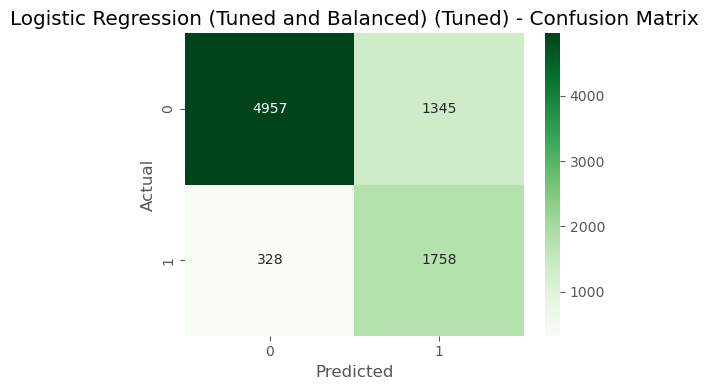

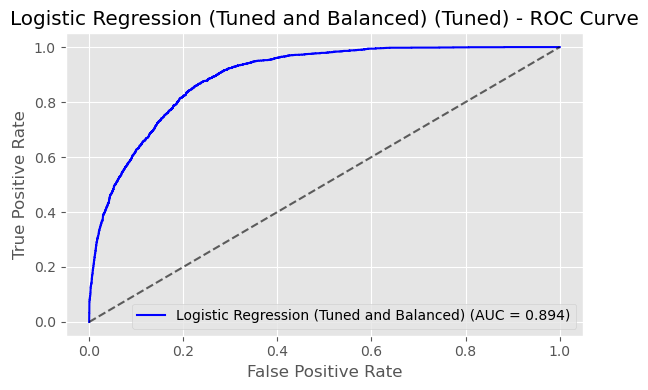

In [63]:
#  TUNED LOGISTIC REGRESSION (with Class Weight Balanced)

# This block performs hyperparameter tuning on Logistic Regression
# using GridSearchCV and evaluates its performance with class balancing applied.

# defining the hyper parameter grid
log_reg_param_grid = {
    'C': [0.01, 0.1, 1, 10],              # Regularization strength (lower = stronger regularization)
    'penalty': ['l2'],                    # L2 is most commonly used
    'solver': ['liblinear', 'lbfgs']      # Compatible solvers for L2
}

# Runing Model with the Tuning and Evaluation Function

results_log_reg_tuned = tune_and_evaluate_model(
    model_class=LogisticRegression(
        max_iter=1000,                   # Ensure convergence
        random_state=42,                 # For Reproducibility
        class_weight='balanced'          # Handle class imbalance by up-weighting the minority class
    ),
    param_grid=log_reg_param_grid,
    name="Logistic Regression (Tuned and Balanced)",
    X_train=X_train_processed,
    y_train=y_train,
    X_test=X_test_processed,
    y_test=y_test,
    color='blue'
)


### **Interpretations of the Tuned Logistic Regression Model**  

- The tuned Logistic Regression model, optimized with C=1, penalty='l2', and solver='liblinear', and adjusted for class imbalance using class_weight='balanced', achieved an accuracy of 80.1% and a strong ROC AUC of 0.8945.
- The model significantly improved its ability to detect high-income individuals, with a recall of 84.3% — a major increase from the baseline — and an F1 score of 0.68, indicating a better trade-off between precision and recall.
- While precision dropped to 56.7%, this is expected when recall is prioritized in imbalanced classification tasks. The model now successfully captures more true positives, making it better suited for real-world use cases where identifying high-income individuals is critical, even at the cost of some false positives.





### **RANDOM FOREST MODEL (TUNED)**


 Tuning & Evaluating: Random Forest (Tuned) with GridSearchCV (cv=5)
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

 Evaluation of Tuned Random Forest (Tuned):
 Accuracy: 0.8301
 Precision: 0.6149
 Recall: 0.8480
 F1 Score: 0.7129
 ROC AUC: 0.9157

 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.82      0.88      6302
           1       0.61      0.85      0.71      2086

    accuracy                           0.83      8388
   macro avg       0.78      0.84      0.80      8388
weighted avg       0.86      0.83      0.84      8388



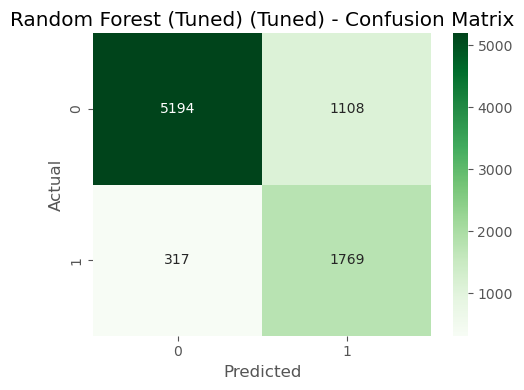

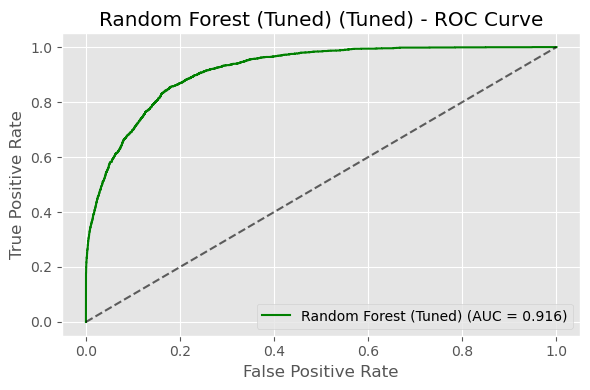

In [64]:
# RANDOM FOREST

# Defining the Hyperparameter Grid

rf_param_grid = {
    'n_estimators': [100, 200],         # Number of trees in the forest
    'max_depth': [None, 10, 20],        # Maximum tree depth
    'min_samples_split': [2, 5],        # Minimum samples to split a node
    'min_samples_leaf': [1, 2]          # Minimum samples at a leaf
}

# Run with the tuning function

results_rf_tuned = tune_and_evaluate_model(
    model_class=RandomForestClassifier(
        random_state=42,                # For reproducibility
        class_weight='balanced'),       # Address class imbalance by adjusting weights
    param_grid=rf_param_grid,           # Hyperparameters to explore as defined above
    name="Random Forest (Tuned)",
    X_train=X_train_processed,
    y_train=y_train,
    X_test=X_test_processed,
    y_test=y_test,
    color='green'
)


### **Interpretations of the Tuned Random Forest Model**  

- The tuned Random Forest model, trained with class_weight='balanced' to address class imbalance and optimized using GridSearchCV with parameters such as max_depth=20, n_estimators=200, and min_samples_leaf=2, showed a strong improvement in detecting high-income individuals.
- It achieved an accuracy of 83.0% and an excellent ROC AUC of 0.9157, reflecting strong overall discriminative ability. Most notably, the model’s recall for the income >50K class rose to 84.8%, a significant gain over the baseline.
-  Although precision dropped to 61.5%, the F1 score of 0.71 indicates a solid balance between capturing more high earners and minimizing false positives.
-  The use of class weighting was crucial in shifting the model’s focus toward the minority class, making it far more effective in real-world scenarios where missing high-income individuals is costly.



### **3. XGBOOST MODEL (TUNED)**


 Tuning & Evaluating: XGBoost (Tuned) with GridSearchCV (cv=5)
Best Parameters: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}

 Evaluation of Tuned XGBoost (Tuned):
 Accuracy: 0.8371
 Precision: 0.6230
 Recall: 0.8744
 F1 Score: 0.7276
 ROC AUC: 0.9301

 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.82      0.88      6302
           1       0.62      0.87      0.73      2086

    accuracy                           0.84      8388
   macro avg       0.79      0.85      0.81      8388
weighted avg       0.87      0.84      0.84      8388



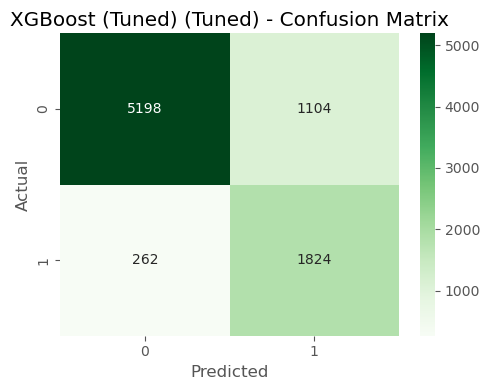

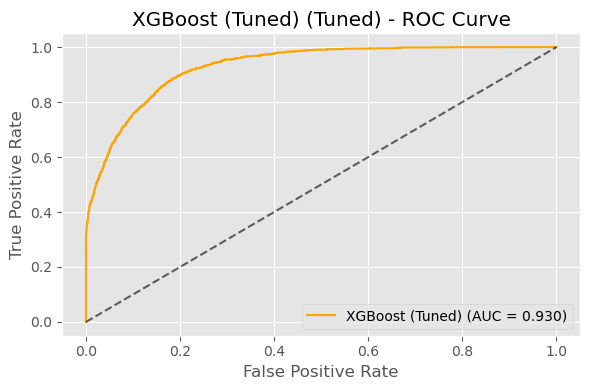

In [65]:
# defining the parameters

xgb_param_grid = {
    'n_estimators': [100, 200],         # Number of boosting rounds
    'max_depth': [3, 6],                # Maximum tree depth
    'learning_rate': [0.1, 0.3],        # Shrinks feature weights (lower = slower but more accurate)
    'subsample': [0.8, 1]               # Fraction of rows per tree
}

# Handling Class Imbalance by Calculating Scale Weight
neg, pos = np.bincount(y_train)         # Count of each class in training target
scale = neg / pos                       # Ratio used to balance the positive class

# Run the Tuning and Evaluation Function

results_xgb_tuned = tune_and_evaluate_model(
    model_class=XGBClassifier(
        use_label_encoder=False,        # Disable deprecated label encoder
        eval_metric='logloss',          # Evaluation metric for binary classification
        random_state=42,                # For Reproducibility
        scale_pos_weight=scale          # to handle imbalances as defined and calculated above
    ),
    param_grid=xgb_param_grid,    # Hyperparameters to explore as defined above
    name="XGBoost (Tuned)",
    X_train=X_train_processed,
    y_train=y_train,
    X_test=X_test_processed,
    y_test=y_test,
    color='orange'
)


### **Interpretations For the Tuned XGBoost Model**  

- The tuned XGBoost model, optimized using GridSearchCV with hyperparameters such as learning_rate=0.3, max_depth=3, n_estimators=200, and subsample=1, delivered exceptional performance. To address class imbalance, the model incorporated scale_pos_weight, computed from the ratio of negative to positive classes in the training set.
- This helped the model give more attention to the minority class during training. It achieved an accuracy of 83.7% and a standout ROC AUC of 0.9301, indicating excellent distinction between income levels.
- Notably, it reached a recall of 87.4% for the income >50K class — the highest among all models — along with a precision of 62.3% and an F1 score of 0.73, showing a strong balance between identifying and correctly classifying high-income earners.
- The tuned parameters helped XGBoost generalize better and focus more accurately on the minority class, making it a top performer in both robustness and real-world applicability.

### **Feature Importance for tuned xgboost**

Total feature names: 47 (matches transformed data: 47)


,Feature,Importance
14,marital_status_Married-spouse-present,0.2887
10,education_Low,0.1174
20,occupation_Exec-managerial,0.0620
9,education_Highest,0.0560
8,education_High-school,0.0446
24,occupation_Other-service,0.0384
7,education_Bachelors,0.0340
1,capital_gain,0.0333
21,occupation_Farming-fishing,0.0282
11,education_Masters,0.0276


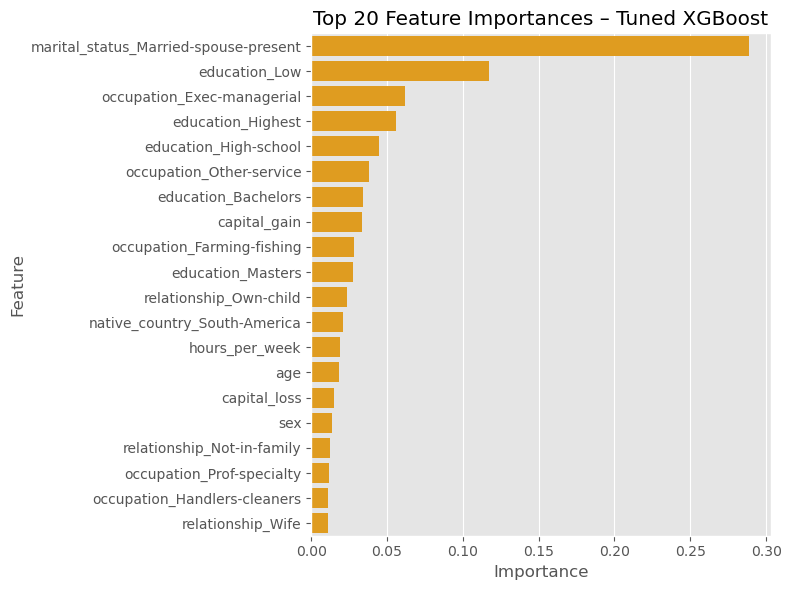

In [77]:
# === PERFECT FEATURE IMPORTANCE FOR TUNED XGBOOST (NO MISMATCH) ===

# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# 1) Transform training data to get exact feature count
X_train_transformed = full_pipeline.transform(X_train)
n_model_features = X_train_transformed.shape[1]

# 2) Build feature names exactly matching transformed data
feature_names = []

# Add numerical columns
feature_names.extend(numerical_cols)

# Add categorical columns after OneHotEncoder
cat_transformer = preprocessor.named_transformers_['cat']
ohe_feature_names = cat_transformer.get_feature_names_out(categorical_cols)
feature_names.extend(ohe_feature_names)

# Add passthrough columns (like 'sex')
for col in X_train.columns:
    if col not in numerical_cols + categorical_cols:
        feature_names.append(col)

# 3) If lengths still mismatch, pad automatically
if len(feature_names) < n_model_features:
    feature_names.extend([f"feature_{i}" for i in range(len(feature_names), n_model_features)])
elif len(feature_names) > n_model_features:
    feature_names = feature_names[:n_model_features]

print(f"Total feature names: {len(feature_names)} (matches transformed data: {n_model_features})")

# 4) Grab tuned XGB model
xgb_tuned_model = results_xgb_tuned['model']

# 5) Build DataFrame of feature importances
xgb_tuned_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_tuned_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 6) Display top 20 features
display(xgb_tuned_importances.head(20))

# 7) Plot top 20 features
plt.figure(figsize=(8, 6))
sns.barplot(
    data=xgb_tuned_importances.head(20),
    x='Importance', y='Feature', color='orange'
)
plt.title("Top 20 Feature Importances – Tuned XGBoost")
plt.tight_layout()
plt.show()


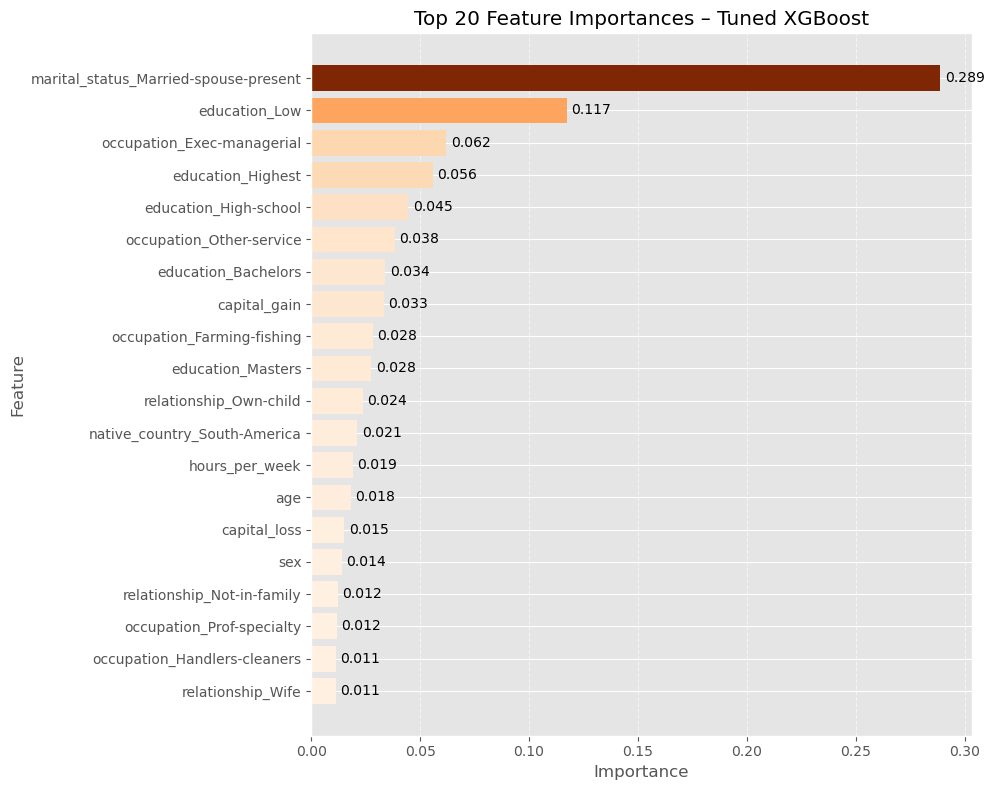

In [78]:
# === PRESENTATION-READY FEATURE IMPORTANCE – TOP 20 ===

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Take top 20 features
top_features = xgb_tuned_importances.head(20).copy()
top_features = top_features.sort_values(by='Importance', ascending=True)  # for horizontal bar chart

# Add a normalized importance for color gradient
top_features['Importance_norm'] = top_features['Importance'] / top_features['Importance'].max()

# Plot horizontal bar chart
plt.figure(figsize=(10, 8))
bars = plt.barh(
    y=top_features['Feature'],
    width=top_features['Importance'],
    color=plt.cm.Oranges(top_features['Importance_norm'])
)

plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 20 Feature Importances – Tuned XGBoost")
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Optional: Add importance value labels at the end of bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.002, bar.get_y() + bar.get_height()/2, f"{width:.3f}", va='center')

plt.tight_layout()
plt.show()


                                       Feature  Importance
14       marital_status_Married-spouse-present      0.2887
10                               education_Low      0.1174
20                  occupation_Exec-managerial      0.0620
9                            education_Highest      0.0560
8                        education_High-school      0.0446
24                    occupation_Other-service      0.0384
7                          education_Bachelors      0.0340
1                                 capital_gain      0.0333
21                  occupation_Farming-fishing      0.0282
11                           education_Masters      0.0276
33                      relationship_Own-child      0.0238
44                native_country_South-America      0.0212
3                               hours_per_week      0.0191
0                                          age      0.0182
2                                 capital_loss      0.0152
46                                         sex      0.01

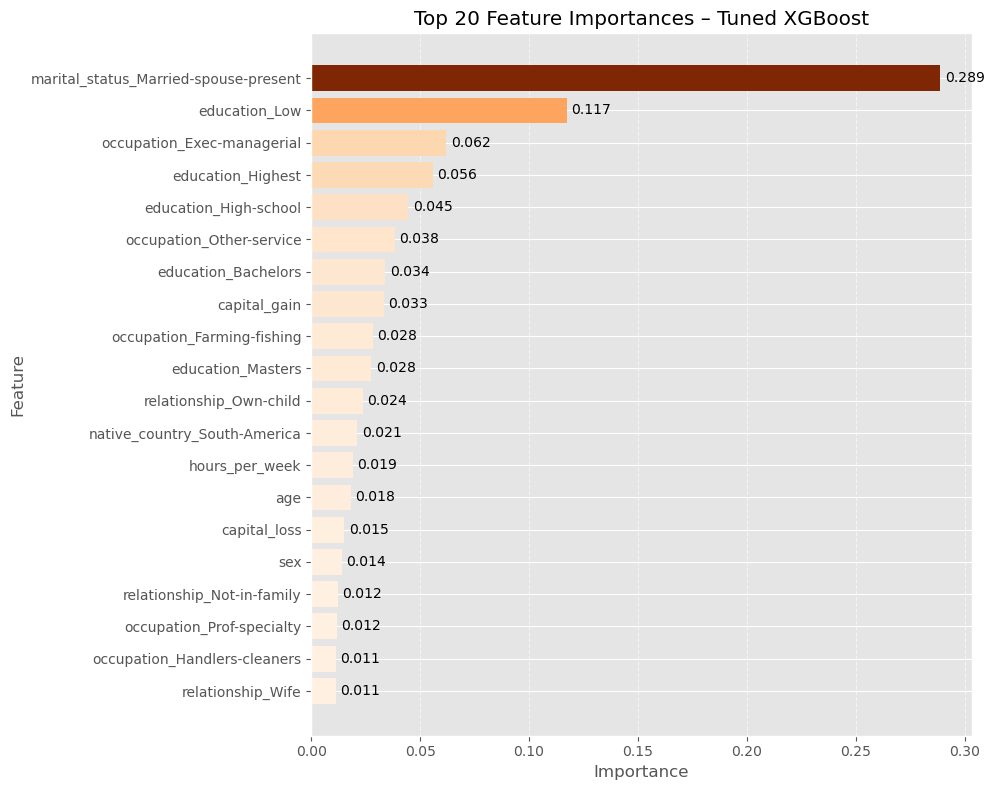

In [82]:
# === TUNED XGBOOST FEATURE IMPORTANCE – FULL LIST + BEAUTIFUL CHART ===

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Transform training data to get exact feature count
X_train_transformed = full_pipeline.transform(X_train)
n_model_features = X_train_transformed.shape[1]

# 2) Build feature names exactly matching transformed data
feature_names = []

# Numerical columns
feature_names.extend(numerical_cols)

# Categorical columns after OneHotEncoder
cat_transformer = preprocessor.named_transformers_['cat']
ohe_feature_names = cat_transformer.get_feature_names_out(categorical_cols)
feature_names.extend(ohe_feature_names)

# Passthrough columns (like 'sex')
for col in X_train.columns:
    if col not in numerical_cols + categorical_cols:
        feature_names.append(col)

# Pad if lengths mismatch (rare)
if len(feature_names) < n_model_features:
    feature_names.extend([f"feature_{i}" for i in range(len(feature_names), n_model_features)])
elif len(feature_names) > n_model_features:
    feature_names = feature_names[:n_model_features]

# 3) Grab tuned XGB model
xgb_tuned_model = results_xgb_tuned['model']

# 4) Build DataFrame of feature importances (full list)
xgb_tuned_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_tuned_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 5) Display full list
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.4f}'.format)
print(xgb_tuned_importances)

# 6) Prepare top 20 features for beautiful horizontal chart
top_features = xgb_tuned_importances.head(20).copy()
top_features = top_features.sort_values(by='Importance', ascending=True)  # horizontal bars
top_features['Importance_norm'] = top_features['Importance'] / top_features['Importance'].max()

# 7) Plot horizontal bar chart
plt.figure(figsize=(10, 8))
bars = plt.barh(
    y=top_features['Feature'],
    width=top_features['Importance'],
    color=plt.cm.Oranges(top_features['Importance_norm'])
)

plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 20 Feature Importances – Tuned XGBoost")
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add value labels at the end of bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.002, bar.get_y() + bar.get_height()/2, f"{width:.3f}", va='center')

plt.tight_layout()
plt.show()


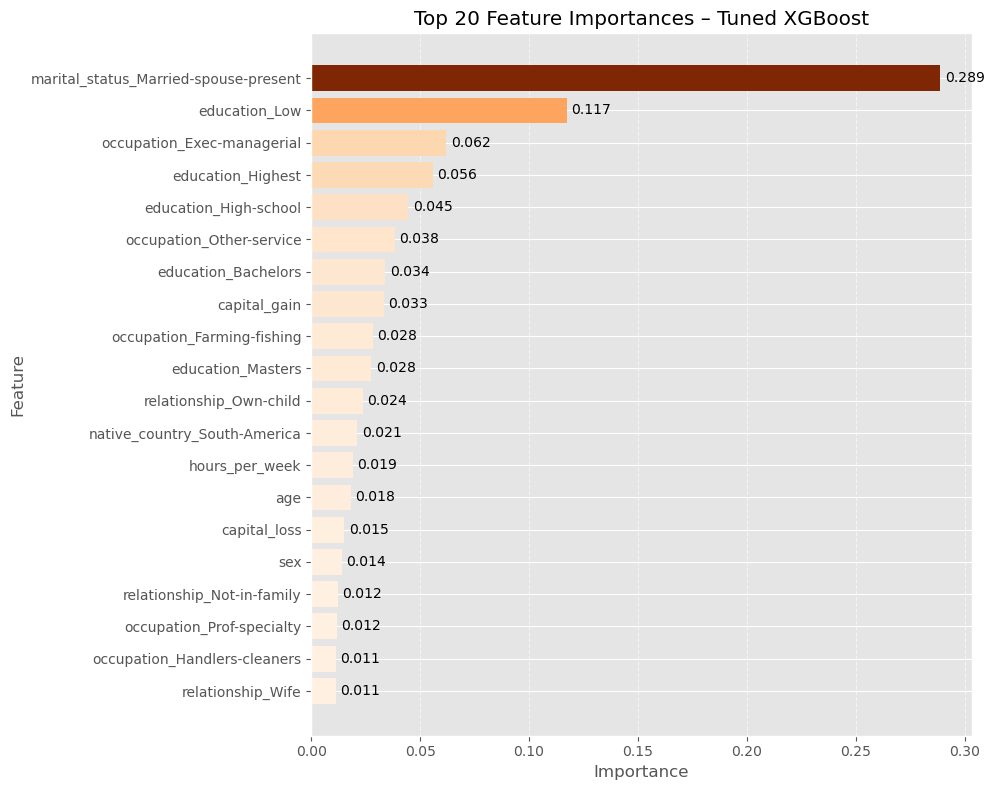

In [79]:
# === FULL FEATURE IMPORTANCE + BEAUTIFUL HORIZONTAL CHART – TUNED XGBOOST ===

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Transform training data to get exact feature count
X_train_transformed = full_pipeline.transform(X_train)
n_model_features = X_train_transformed.shape[1]

# 2) Build feature names exactly matching transformed data
feature_names = []

# Numerical columns
feature_names.extend(numerical_cols)

# Categorical columns after OneHotEncoder
cat_transformer = preprocessor.named_transformers_['cat']
ohe_feature_names = cat_transformer.get_feature_names_out(categorical_cols)
feature_names.extend(ohe_feature_names)

# Passthrough columns (like 'sex')
for col in X_train.columns:
    if col not in numerical_cols + categorical_cols:
        feature_names.append(col)

# Pad if lengths mismatch (rare, safety check)
if len(feature_names) < n_model_features:
    feature_names.extend([f"feature_{i}" for i in range(len(feature_names), n_model_features)])
elif len(feature_names) > n_model_features:
    feature_names = feature_names[:n_model_features]

# 3) Grab tuned XGB model
xgb_tuned_model = results_xgb_tuned['model']

# 4) Build DataFrame of feature importances
xgb_tuned_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_tuned_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 5) Prepare top 20 features for beautiful horizontal chart
top_features = xgb_tuned_importances.head(20).copy()
top_features = top_features.sort_values(by='Importance', ascending=True)  # horizontal bars left-to-right
top_features['Importance_norm'] = top_features['Importance'] / top_features['Importance'].max()

# 6) Plot horizontal bar chart
plt.figure(figsize=(10, 8))
bars = plt.barh(
    y=top_features['Feature'],
    width=top_features['Importance'],
    color=plt.cm.Oranges(top_features['Importance_norm'])
)

plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 20 Feature Importances – Tuned XGBoost")
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add value labels at the end of bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.002, bar.get_y() + bar.get_height()/2, f"{width:.3f}", va='center')

plt.tight_layout()
plt.show()


### **SUPPORT VECTOR MACHINE MODEL - SVM (TUNED)**


 Tuning & Evaluating: SVM (Tuned) with GridSearchCV (cv=5)
Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

 Evaluation of Tuned SVM (Tuned):
 Accuracy: 0.8070
 Precision: 0.5743
 Recall: 0.8648
 F1 Score: 0.6903
 ROC AUC: 0.9053

 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.79      0.86      6302
           1       0.57      0.86      0.69      2086

    accuracy                           0.81      8388
   macro avg       0.76      0.83      0.78      8388
weighted avg       0.85      0.81      0.82      8388



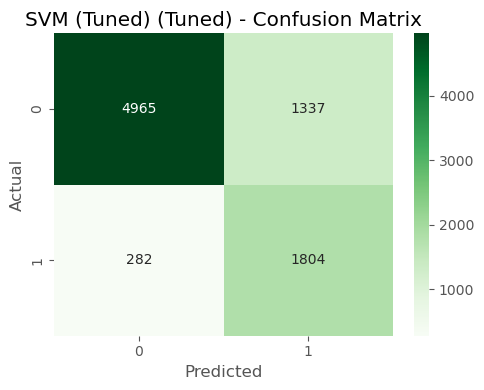

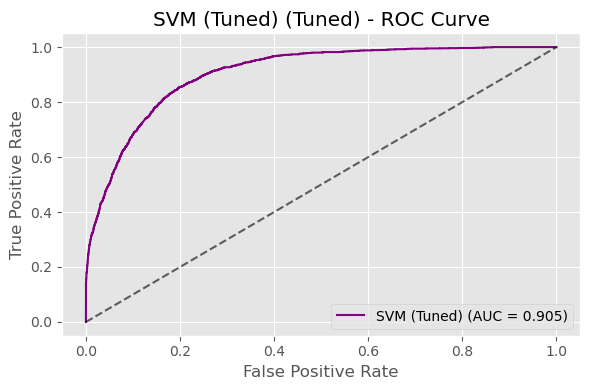

In [83]:
# Defining the Hyperparameter Grid

svm_param_grid = {
    'C': [0.1, 1, 10],              # Regularization (higher = less regularization, lower = more regularization, helps prevent overfitting)
    'kernel': ['linear', 'rbf'],    # Linear is faster; RBF can model curves
    'gamma': ['scale', 'auto']      # Kernel coefficient (applies to RBF)
}


# Run the tuning and evaluation function
results_svm_tuned = tune_and_evaluate_model(
    model_class=SVC(
        probability=True,           # Enables probability estimates (needed for ROC curve and AUC)
        random_state=42,            # Ensures reproducibility
        class_weight='balanced'     # Adjusts weights inversely proportional to class frequencies (handles imbalance)
    ),
    param_grid=svm_param_grid,
    name="SVM (Tuned)",
    X_train=X_train_processed,
    y_train=y_train,
    X_test=X_test_processed,
    y_test=y_test,
    color='purple'
)


### **Interpretations for the Tuned SVM Model**  

- The tuned Support Vector Machine (SVM) model, optimized using GridSearchCV with the best parameters C=10, gamma='auto', and kernel='rbf', was also configured with class_weight='balanced' to address the dataset’s class imbalance. This significantly improved its ability to identify high-income individuals.
- The model achieved an accuracy of 80.7% and a strong ROC AUC of 0.9053, indicating solid overall discriminative power. Most notably, it reached a recall of 86.5% for the income >50K class, a major improvement from its baseline performance while maintaining a precision of 57.4% and an F1 score of 0.69.
- The balanced class weighting helped the model focus more on the underrepresented class, making it especially useful for real-world scenarios where capturing as many true high earners as possible is essential, even at the cost of some false positives.
- Computationally Expensive: Tuned SVM took over 3 hours to run, due to hyperparameter tuning, including class_weight tuning and large dataset.

### **COMPARISON OF THE 4 TUNED MODELS**

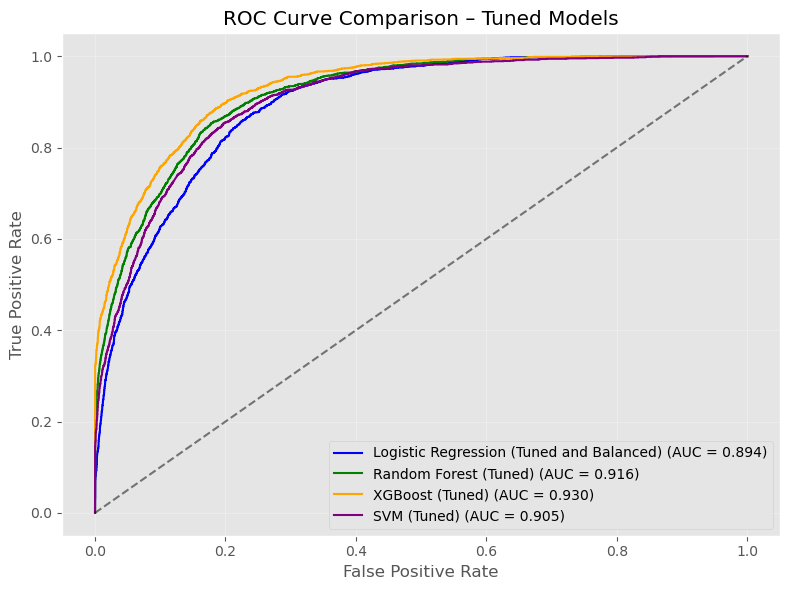

In [85]:
# COMPARING ALL MY 4 TUNED MODELS


# Preparing figure
plt.figure(figsize=(8, 6))

# List of tuned models results and their colors
models = [
    (results_log_reg_tuned, 'blue'),       # Tuned Logistivs Regression
    (results_rf_tuned, 'green'),           # Tuned Random Forest Model
    (results_xgb_tuned, 'orange'),         # Tuned XGBoost Model
    (results_svm_tuned, 'purple'),         # Tuned SVM Model
]

# Plotting ROC for each model
for result, color in models:
    plt.plot(
        result['fpr'],                     # False Positive Rate
        result['tpr'],                     # True Positive Rate
             label=f"{result['name']} (AUC = {result['auc']:.3f})",     # Model name and AUC score
             color=color                   # Line color for the model
    )

# Diagonal line
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)

# Formatting
plt.title("ROC Curve Comparison – Tuned Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')             # Place legend in bottom-right corner
plt.grid(alpha=0.3)                       # Light grid for better readability
plt.tight_layout()                        # Adjust layout for clean rendering
plt.show()                                # show the plot


### **Summary on the 4 Tuned Models**  

- Among the four tuned models, XGBoost emerged as the top performer, achieving the highest ROC AUC (0.9301) and recall (87.4%) for the minority class (income >50K), making it the most effective at identifying high-income individuals while maintaining a balanced F1 score (0.73).
- Random Forest, also tuned with class weights, followed closely with a high recall of 84.8% and a solid ROC AUC (0.9157), showing strong sensitivity to the positive class. The tuned SVM, aided by class_weight='balanced', also delivered strong recall (86.5%) and a respectable AUC (0.9053), though with slightly lower precision.
- Logistic Regression, though simplest, achieved a competitive recall of 84.3% and ROC AUC of 0.8945, demonstrating improved sensitivity due to class balancing but at the cost of lower precision. Overall, while all models improved significantly with tuning and imbalance handling, XGBoost stood out for offering the best trade-off between precision and recall, and consistently strong performance across all metrics.

### **Tabular Comparison for tuned models**

In [86]:
# --- Collect metrics for all tuned models into a table ---
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# import pandas as pd

# Helper to compute metrics from your stored results
def get_metrics(result, y_true):
    y_pred = result['y_pred']
    y_proba = result['y_proba']
    return {
        'Model': result['name'],
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'ROC AUC': roc_auc_score(y_true, y_proba)
    }

# Collect metrics for each tuned model
tuned_results = []
tuned_results.append(get_metrics(results_log_reg_tuned, y_test))
tuned_results.append(get_metrics(results_rf_tuned, y_test))
tuned_results.append(get_metrics(results_xgb_tuned, y_test))
tuned_results.append(get_metrics(results_svm_tuned, y_test))

# Create DataFrame
tuned_df = pd.DataFrame(tuned_results)

# Round for readability and reorder columns
tuned_df = tuned_df.round(3)
tuned_df = tuned_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']]

# Sort by ROC AUC (or any metric you prefer)
tuned_df = tuned_df.sort_values(by='ROC AUC', ascending=False).reset_index(drop=True)

print("\n=== Tuned Models Performance Summary ===\n")
print(tuned_df.to_string(index=False))



=== Tuned Models Performance Summary ===

                                   Model  Accuracy  Precision  Recall  F1 Score  ROC AUC
                         XGBoost (Tuned)    0.8370     0.6230  0.8740    0.7280   0.9300
                   Random Forest (Tuned)    0.8300     0.6150  0.8480    0.7130   0.9160
                             SVM (Tuned)    0.8070     0.5740  0.8650    0.6900   0.9050
Logistic Regression (Tuned and Balanced)    0.8010     0.5670  0.8430    0.6780   0.8940


### **Comparing Baseline and Tuned Models**

### **with ROC AUC improvement**

In [89]:
# import pandas as pd
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# -------- 1. Helper function --------
def compute_metrics(result, y_true):
    return {
        'Accuracy': accuracy_score(y_true, result['y_pred']),
        'Precision': precision_score(y_true, result['y_pred']),
        'Recall': recall_score(y_true, result['y_pred']),
        'F1 Score': f1_score(y_true, result['y_pred']),
        'ROC AUC': roc_auc_score(y_true, result['y_proba'])
    }

# -------- 2. Collect metrics --------
models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'SVM']

baseline_metrics = {m: compute_metrics(results_dict, y_test)
                    for m, results_dict in zip(models, 
                                               [results_log_reg, results_rf, results_xgb, results_svm])}

tuned_metrics = {m: compute_metrics(results_dict, y_test)
                 for m, results_dict in zip(models,
                                            [results_log_reg_tuned, results_rf_tuned, results_xgb_tuned, results_svm_tuned])}

# -------- 3. Build compact comparison DataFrame --------
# Create a multi-index column DataFrame
comparison_data = {}
for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']:
    comparison_data[(metric, 'Baseline')] = [baseline_metrics[m][metric] for m in models]
    comparison_data[(metric, 'Tuned')] = [tuned_metrics[m][metric] for m in models]

comparison_df = pd.DataFrame(comparison_data, index=models)
comparison_df.index.name = 'Model'

# Round for neatness
comparison_df = comparison_df.round(3)

# -------- 4. Display --------
print("\n=== Baseline vs Tuned Model Metrics ===\n")
display(comparison_df)



=== Baseline vs Tuned Model Metrics ===



Accuracy        Precision          Recall        F1 Score  \
                    Baseline  Tuned  Baseline  Tuned Baseline  Tuned Baseline   
Model                                                                           
Logistic Regression   0.8340 0.8010    0.7090 0.5670   0.5630 0.8430   0.6270   
Random Forest         0.8220 0.8300    0.6610 0.6150   0.5810 0.8480   0.6190   
XGBoost               0.8670 0.8370    0.7780 0.6230   0.6500 0.8740   0.7080   
SVM                   0.8480 0.8070    0.7640 0.5740   0.5620 0.8650   0.6480   

                            ROC AUC         
                     Tuned Baseline  Tuned  
Model                                       
Logistic Regression 0.6780   0.8950 0.8940  
Random Forest       0.7130   0.8780 0.9160  
XGBoost             0.7280   0.9270 0.9300  
SVM                 0.6900   0.8890 0.9050

### **Saving my Preprocessing Pipeling and Models (Baseline and Tuned)**

In [92]:


# -------- 1. Preprocessing pipeline --------
joblib.dump(full_pipeline, 'full_pipeline.pkl')
print("Saved preprocessing pipeline: full_pipeline.pkl")

# -------- 2. Baseline models --------
joblib.dump(results_log_reg['model'], 'logreg_baseline.pkl')
joblib.dump(results_rf['model'], 'rf_baseline.pkl')
joblib.dump(results_xgb['model'], 'xgb_baseline.pkl')
joblib.dump(results_svm['model'], 'svm_baseline.pkl')
print("Saved baseline models: Logistic Regression, Random Forest, XGBoost, SVM")

# -------- 3. Tuned models --------
joblib.dump(results_log_reg_tuned['model'], 'logreg_tuned.pkl')
joblib.dump(results_rf_tuned['model'], 'rf_tuned.pkl')
joblib.dump(results_xgb_tuned['model'], 'xgb_tuned.pkl')
joblib.dump(results_svm_tuned['model'], 'svm_tuned.pkl')
print("Saved tuned models: Logistic Regression, Random Forest, XGBoost, SVM")


Saved preprocessing pipeline: full_pipeline.pkl
Saved baseline models: Logistic Regression, Random Forest, XGBoost, SVM
Saved tuned models: Logistic Regression, Random Forest, XGBoost, SVM


### **Model Selection Rationale**
I selected four different models to capture a range of learning behaviors and compare performance across both simple and complex classifiers:

**Logistic Regression** was used as a baseline because it's simple, fast, and easy to interpret. It’s useful for understanding basic linear relationships in the data.

**Random Forest** was chosen for its ability to handle non-linear patterns, reduce overfitting through ensemble learning, and provide insights into feature importance.

**XGBoost** was included for its high predictive power, regularization capabilities, and efficiency on structured/tabular data. It’s widely regarded as one of the most powerful algorithms for classification tasks.

**Support Vector Machine (SVM)** was selected to test a different learning approach, especially effective in high-dimensional spaces and useful for handling class imbalance with kernel tricks and tuning.

This combination allowed me to compare linear vs. non-linear models, simple vs. complex learners, and evaluate how each handles class imbalance and feature interactions.



### **SUMMARY AND RECOMMENDATIONS**


### **EDA Summary: Key Trends and Patterns**
**Income Distribution is Imbalanced**
- Majority of individuals earn ≤50K, indicating a class imbalance that was addressed in modeling.

**Age vs Income**
- Older individuals are more likely to earn >50K. High earners are rare below age 30 and most concentrated above 40.

**Education and Income Correlation**  
- Higher education levels (e.g. Bachelors, Masters, Doctorate) show a strong upward trend in the proportion of high earners.

**Age and Education Combined Impact on Income**
- The likelihood of earning >50K increases with both age and education. Individuals aged 36–65 with higher education are significantly more likely to be high earners. In contrast, younger individuals, even with advanced degrees, show lower income proportions, suggesting that education alone isn't enough early on—experience (age) and education together drive income growth.

**Work Hours Trend**
- Individuals earning >50K generally work longer hours, although working more doesn’t always guarantee a higher income.

**Capital Gain Indicator**
- Earning any capital gain is a strong signal of higher income. Most low earners report zero capital gain.

**Gender Gap**
- Across all workclasses and education levels, men consistently out-earn women, highlighting a clear gender income disparity.

**Workclass Differences**  
Government and self-employed roles have higher proportions of >50K earners, while the private sector dominates in count but not in income.

**Sex and Workclass Impact on Income**
- A clear gender gap exists across work sectors—men are consistently more likely to earn >$50K than women in nearly every workclass. This reflects ongoing gender-based income disparities. Notably, despite lower female representation in the dataset, the number of unemployed women is nearly double that of men.

**Occupation Impact**  
-Managerial and professional jobs stand out with the highest income levels, while service and labor roles have the lowest.

**Marital Status Influence**
- Married individuals, especially men, are significantly more likely to earn >50K than singles or divorced individuals.

**Country and Race Patterns**
- While the dataset is mostly U.S.-based and racially skewed, country of origin shows minor variations in income proportions.

I used these findings to guide my modeling strategy in the model development phase



### **Model Performance**

How the models Performed, Their Effectiveness in Income Level and How The can be improved

The machine learning models developed for this project demonstrated strong effectiveness in predicting individual income levels, especially after tuning and addressing class imbalance. Among the models tested, XGBoost after being tuned and applying scale_pos_weight to assist the imbalance, performed best overall, achieving the highest ROC AUC (0.9301) and recall (87.4%) for the income >50K class, indicating excellent discriminative power and strong ability to identify high-income individuals. Other models such as Random Forest, SVM, and Logistic Regression also showed significant improvements after tuning and applying techniques like class_weight='balanced'

While performance was solid, there is still room for improvement. The trade-off between recall and precision remains a challenge — most models favored high recall to capture more true positives, but this came at the cost of lower precision, resulting in more false positives. To further improve model effectiveness, techniques such as feature selection, ensemble stacking, or SMOTE (Synthetic Minority Oversampling Technique) could be applied. Additionally, exploring advanced model explainability tools (like SHAP) can help understand feature influence and refine decision-making. Finally, collecting more balanced data or engineering new, informative features could further enhance model accuracy and generalization.


### **RECOMMENDATION**  

**From Data Exploration and EDA**
The dataset showed significant class imbalance and categorical skew, particularly in features like sex, race, income and native_country. While grouping and transformation improved interpretability, however, collecting more balanced and diverse data, especially for underrepresented groups should be priotized. Additionally, Advanced feature selection techniques or dimensionality reduction like PCA can also be explored to reduce noise and redundancy.

**From Model Development and Evaluation**
While tuning and imbalance handling (using class_weight='balanced' and scale_pos_weight) significantly boosted performance, especially recall for high-income earners, further steps can be taken. Collecting more balanced data should be priotized. Techniques like SMOTE or other oversampling strategies may provide more robust results without sacrificing precision. Exploring ensemble methods like stacking or blending could also combine model strengths. Finally, incorporating explainable AI tools like SHAP or LIME can help improve model transparency and trustworthiness by revealing how individual features contribute to predictions. Lastly PCA could also have been helpful.

Together, these strategies offer a clear path to improving both the accuracy and fairness of income prediction models in future iterations.



### **CONCLUSION**  

This project set out to build a machine learning model capable of accurately predicting whether an individual earns more than $50K annually, using demographic and employment-related attributes. The process began with robust data cleaning and thoughtful feature engineering, including handling missing values, grouping sparse categorical values, addressing outliers, and encoding categorical variables. This foundation ensured the dataset was well-prepared for modeling.

Comprehensive exploratory data analysis (EDA) revealed several key trends: higher education levels, older age groups, and working more hours per week were all strongly associated with higher income levels. Individuals who were married with a present spouse, employed in private or government sectors, and held higher educational degrees (e.g., Bachelor’s, Master’s) showed a higher likelihood of earning above $50K. While some variables like sex, race, and native_country showed class imbalance and limited predictive power on their own, they helped expose underlying biases and data distributions that informed preprocessing and model decisions.

Four models were developed — logistic regression, random forest, XGBoost, and SVM — each evaluated in their baseline and tuned forms. Performance improved significantly after applying hyperparameter tuning and class imbalance handling techniques like class_weight='balanced' and scale_pos_weight. Among them, XGBoost emerged as the strongest model, achieving the highest ROC AUC (0.9301) and recall (87.4%) for the high-income class, making it the most effective at identifying individuals earning more than $50K.

While the final models demonstrated excellent predictive power, especially for the underrepresented income >50K class, the trade-off between precision and recall remained a challenge. To further enhance performance and fairness, future work could explore SMOTE for oversampling, feature selection, stacked ensembles, or explainability tools like SHAP to improve trust and refine decision logic.

In conclusion, this project demonstrates the value of a well-structured machine learning workflow — from data exploration and cleaning to modeling and interpretation — and provides a strong, extensible framework for income prediction and similar real-world classification tasks.











                                                         
                                                                                                                     
                                                                                                                     
                                                                                                                     
                                                                                                                     
                                                                                                                     
                                                                                                                     
                                                                                                                     
                                                                                                                     